# 1. Web Scraping

## Scraping using "Selenuim" Librairie 

In [89]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

def getComments(app_id, verbose):
    
    driver_path = 'C:/Users/HP/driver124/chromedriver-win64/chromedriver.exe'  
    options = webdriver.ChromeOptions()
    options.add_argument('--disable-application-cache')
    options.add_argument('--ignore-certificate-errors')   
    driver = webdriver.Chrome(executable_path=driver_path,options=options)
    driver.set_window_size(1120, 1000)
    url = 'https://play.google.com/store/apps/details?id='+app_id
    driver.get(url)
    reviews = []

    i=0
    driver.find_element(By.CSS_SELECTOR, "section div.Jwxk6d div:nth-child(5) div div button span").click()
    
    review_buttons = driver.find_elements(By.CLASS_NAME,'RHo1pe')              
    print("Notes et avis button clicked!! ")

    for rev_button in review_buttons:     
        i= i+1
        print("Progress: {}".format("" + str(i)))      
        
        time.sleep(2)
        rev_button.click()  
        # print("rev button clicked !!")
        time.sleep(1) 
        
        username = rev_button.find_element(By.XPATH, './/div[@class="X5PpBb"]').text
        text_review = rev_button.find_element(By.XPATH, './/div[@class="h3YV2d"]').text
        date_review = rev_button.find_element(By.CLASS_NAME,'bp9Aid').text  
        
        #Printing for debugging
        if verbose:
            print("User Name: {}".format(username))
            print("review: {}".format(text_review[:800]))
            print("date review: {}".format(date_review))

        reviews.append({
        "User Name" : username,
        "Reviews" : text_review,
        "Date" : date_review,
        })            

    return pd.DataFrame(reviews)

In [90]:
getComments("com.einnovation.temu", False)

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\1506572040.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path,options=options)


Notes et avis button clicked!! 
Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15
Progress: 16
Progress: 17
Progress: 18
Progress: 19
Progress: 20


User Name                                            Reviews  \
0         Catherine ROCHE  de très bons produits et parfois certains nett...   
1              inco gnito  n'écoutez pas les critiques infondées. tout ce...   
2           Martin Vanhee  Beaucoup d'offres donc les prix sont très comp...   
3            Jordan Augay  Livraison rapide et produits de bonnes facture...   
4               Nico Kazu  Danger ! Scandaleux de voir qu'ils ne précisen...   
5           Anick Lacombe  Positif : prix incroyablement bas, qualité exc...   
6          Thomas Véniard  Même aux prix ridiculement faible des articles...   
7         Emmanuel DUBOIS  Attention aux dimensions des articles qu'il fa...   
8                  Laurie  IMPOSER 15€ d'achats minimum, c'est BEAUCOUP T...   
9     Jean-Bernard Mylord  L'envoi ne correspond pas à l'achat. Exemple :...   
10    Christine Toussaint  Je ne comprends pas, on me donne un coupon de ...   
11  Lauriane Lecarpentier  Comment cette appli peut encore être notée 4,7...   
12              Yve Ergon  Quand vous faites la publicité sur youtube, et...   
13       Ghislaine Dussel  Evidemment des mauvaises critiques de certains...   
14        Annick Bouillon  Cela fait plusieurs fois que je passe une comm...   
15      Violaine Guiliana  réception des colis plutôt rapide. ne font pas...   
16          Tempête Flash  Ce n' ai vraiment pas cher, mais nous pouvons ...   
17           angst benoit  vraiment au top pour les petits budgets, les c...   
18          Herve Loubere  Fidèle client d Aliexpress j ai été énormément...   
19            Cathia Lizé  Bon produit. La qualité est quand même bonne p...   

             Date  
0     18 mai 2024  
1     19 mai 2024  
2     18 mai 2024  
3   26 avril 2024  
4   29 avril 2024  
5   24 avril 2024  
6     14 mai 2024  
7    7 avril 2024  
8      1 mai 2024  
9   15 avril 2024  
10    20 mai 2024  
11    20 mai 2024  
12    17 mai 2024  
13     1 mai 2024  
14     9 mai 2024  
15    11 mai 2024  
16    13 mai 2024  
17    19 mai 2024  
18     3 mai 2024  
19    16 mai 2024

In [92]:
app = "com.einnovation.temu"
reviews_temu = getComments(app, True)
reviews_temu.to_csv('Reviews_'+app+'.csv', index=False, sep=',')
reviews_temu

C:\Users\HP\AppData\Local\Temp\ipykernel_2408\1506572040.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=driver_path,options=options)


Notes et avis button clicked!! 
Progress: 1
User Name: Catherine ROCHE
review: de très bons produits et parfois certains nettement moins bien en qualité. Mais compte tenu des prix cela me semble normal. Temps de livraison respecté. Des emballages très résistants. Par contre je n'arrive pas à comprendre les systèmes de promotion tels que les remboursements, ou les pourcentages de réduction. ce n'est pas simple, pas assez visuel et pas intuitif sur le site. Globalement satisfaite après 3 livraisons de produits.
date review: 18 mai 2024
Progress: 2
User Name: inco gnito
review: n'écoutez pas les critiques infondées. tout ce qu'on peut réprocher à cette appli peut aussi être reproché aux autres concurrents. tout ce que je sais c'est que temu augmente VRAIMENT mon pouvoir d'achat. et j'y trouve ce que je ne trouve pas ailleurs. les notifications sont certes envahissantes mais on peut les paramétrer. bref, excellent. appli indispensable en ces temps d'inflation
date review: 19 mai 2024
Progr

User Name                                            Reviews  \
0         Catherine ROCHE  de très bons produits et parfois certains nett...   
1              inco gnito  n'écoutez pas les critiques infondées. tout ce...   
2           Martin Vanhee  Beaucoup d'offres donc les prix sont très comp...   
3            Jordan Augay  Livraison rapide et produits de bonnes facture...   
4               Nico Kazu  Danger ! Scandaleux de voir qu'ils ne précisen...   
5           Anick Lacombe  Positif : prix incroyablement bas, qualité exc...   
6          Thomas Véniard  Même aux prix ridiculement faible des articles...   
7         Emmanuel DUBOIS  Attention aux dimensions des articles qu'il fa...   
8                  Laurie  IMPOSER 15€ d'achats minimum, c'est BEAUCOUP T...   
9     Jean-Bernard Mylord  L'envoi ne correspond pas à l'achat. Exemple :...   
10    Christine Toussaint  Je ne comprends pas, on me donne un coupon de ...   
11  Lauriane Lecarpentier  Comment cette appli peut encore être notée 4,7...   
12              Yve Ergon  Quand vous faites la publicité sur youtube, et...   
13       Ghislaine Dussel  Evidemment des mauvaises critiques de certains...   
14        Annick Bouillon  Cela fait plusieurs fois que je passe une comm...   
15      Violaine Guiliana  réception des colis plutôt rapide. ne font pas...   
16          Tempête Flash  Ce n' ai vraiment pas cher, mais nous pouvons ...   
17           angst benoit  vraiment au top pour les petits budgets, les c...   
18          Herve Loubere  Fidèle client d Aliexpress j ai été énormément...   
19            Cathia Lizé  Bon produit. La qualité est quand même bonne p...   

             Date  
0     18 mai 2024  
1     19 mai 2024  
2     18 mai 2024  
3   26 avril 2024  
4   29 avril 2024  
5   24 avril 2024  
6     14 mai 2024  
7    7 avril 2024  
8      1 mai 2024  
9   15 avril 2024  
10    20 mai 2024  
11    20 mai 2024  
12    17 mai 2024  
13     1 mai 2024  
14     9 mai 2024  
15    11 mai 2024  
16    13 mai 2024  
17    19 mai 2024  
18     3 mai 2024  
19    16 mai 2024

In [93]:
temu_data = pd.read_csv('Reviews_com.einnovation.temu.csv')
temu_data

User Name                                            Reviews  \
0         Catherine ROCHE  de très bons produits et parfois certains nett...   
1              inco gnito  n'écoutez pas les critiques infondées. tout ce...   
2           Martin Vanhee  Beaucoup d'offres donc les prix sont très comp...   
3            Jordan Augay  Livraison rapide et produits de bonnes facture...   
4               Nico Kazu  Danger ! Scandaleux de voir qu'ils ne précisen...   
5           Anick Lacombe  Positif : prix incroyablement bas, qualité exc...   
6          Thomas Véniard  Même aux prix ridiculement faible des articles...   
7         Emmanuel DUBOIS  Attention aux dimensions des articles qu'il fa...   
8                  Laurie  IMPOSER 15€ d'achats minimum, c'est BEAUCOUP T...   
9     Jean-Bernard Mylord  L'envoi ne correspond pas à l'achat. Exemple :...   
10    Christine Toussaint  Je ne comprends pas, on me donne un coupon de ...   
11  Lauriane Lecarpentier  Comment cette appli peut encore être notée 4,7...   
12              Yve Ergon  Quand vous faites la publicité sur youtube, et...   
13       Ghislaine Dussel  Evidemment des mauvaises critiques de certains...   
14        Annick Bouillon  Cela fait plusieurs fois que je passe une comm...   
15      Violaine Guiliana  réception des colis plutôt rapide. ne font pas...   
16          Tempête Flash  Ce n' ai vraiment pas cher, mais nous pouvons ...   
17           angst benoit  vraiment au top pour les petits budgets, les c...   
18          Herve Loubere  Fidèle client d Aliexpress j ai été énormément...   
19            Cathia Lizé  Bon produit. La qualité est quand même bonne p...   

             Date  
0     18 mai 2024  
1     19 mai 2024  
2     18 mai 2024  
3   26 avril 2024  
4   29 avril 2024  
5   24 avril 2024  
6     14 mai 2024  
7    7 avril 2024  
8      1 mai 2024  
9   15 avril 2024  
10    20 mai 2024  
11    20 mai 2024  
12    17 mai 2024  
13     1 mai 2024  
14     9 mai 2024  
15    11 mai 2024  
16    13 mai 2024  
17    19 mai 2024  
18     3 mai 2024  
19    16 mai 2024

## Scraping Using "google_play_scraper"

In [ ]:
!pip install google_play_scraper

In [ ]:
from google_play_scraper import app, Sort, reviews_all

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
Temu_US = reviews_all(
    'com.einnovation.temu',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='US', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)
df = pd.json_normalize(Temu_US)
print(df.shape)
df.head()

(1393, 11)


reviewId                    userName  \
0  48a4f0b4-7d22-4019-973e-3b181635eede  Temu Coupon Code- afg631ᒿ7   
1  e4d704e8-9b67-4448-a695-a0bacaf7bc36                LeeLee Is Me   
2  0c923248-0056-41ee-a335-10f5a48ed4a7       Temu Coupon- afg631ᒿ7   
3  f8dfdbdc-b6d2-4984-b37b-a75c9dcc0935                 Koren Cloud   
4  ee01863e-922e-4d3d-b7ca-95159f2d812d                Nixx Pumpkin   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Enter Coupon in temu profile to get $100. Temu...      4             48   
1  They are only cheap in the beginning and if yo...      2              8   
2  Enter Coupon in temu profile to get $100. Upda...      3             13   
3  You can get cheap stuff which is great BUT the...      2             85   
4  The rating is only because I haven't gotten an...      1              9   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0               2.63.0 2024-05-05 10:43:36         None       NaT     2.63.0  
1               2.63.0 2024-05-01 17:26:58         None       NaT     2.63.0  
2               2.63.0 2024-05-05 10:57:04         None       NaT     2.63.0  
3               2.63.0 2024-05-03 13:55:14         None       NaT     2.63.0  
4               2.63.0 2024-04-30 03:01:46         None       NaT     2.63.0

In [ ]:
df.to_csv('temu_US_1393_score.csv', index=False)

# 2. Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
train_revUS = pd.read_csv('temu_US_1393_score.csv')
train_revUS.head(3)

reviewId                    userName  \
0  48a4f0b4-7d22-4019-973e-3b181635eede  Temu Coupon Code- afg631ᒿ7   
1  e4d704e8-9b67-4448-a695-a0bacaf7bc36                LeeLee Is Me   
2  0c923248-0056-41ee-a335-10f5a48ed4a7       Temu Coupon- afg631ᒿ7   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Enter Coupon in temu profile to get $100. Temu...      4             48   
1  They are only cheap in the beginning and if yo...      2              8   
2  Enter Coupon in temu profile to get $100. Upda...      3             13   

  reviewCreatedVersion                   at replyContent repliedAt appVersion  
0               2.63.0  2024-05-05 10:43:36          NaN       NaN     2.63.0  
1               2.63.0  2024-05-01 17:26:58          NaN       NaN     2.63.0  
2               2.63.0  2024-05-05 10:57:04          NaN       NaN     2.63.0

In [4]:
train_revUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1393 non-null   object
 1   userName              1392 non-null   object
 2   userImage             1393 non-null   object
 3   content               1393 non-null   object
 4   score                 1393 non-null   int64 
 5   thumbsUpCount         1393 non-null   int64 
 6   reviewCreatedVersion  1393 non-null   object
 7   at                    1393 non-null   object
 8   replyContent          114 non-null    object
 9   repliedAt             114 non-null    object
 10  appVersion            1393 non-null   object
dtypes: int64(2), object(9)
memory usage: 119.8+ KB


In [5]:
train_revUS = train_revUS.drop_duplicates(subset=["userName"])
train_revUS.shape

(1343, 11)

In [6]:
train_revUS = train_revUS.drop(columns=['userImage', 'appVersion', 'repliedAt', 'replyContent' , 'at', 'reviewCreatedVersion', 'reviewId' ])
train_revUS.head()

userName  \
0  Temu Coupon Code- afg631ᒿ7   
1                LeeLee Is Me   
2       Temu Coupon- afg631ᒿ7   
3                 Koren Cloud   
4                Nixx Pumpkin   

                                             content  score  thumbsUpCount  
0  Enter Coupon in temu profile to get $100. Temu...      4             48  
1  They are only cheap in the beginning and if yo...      2              8  
2  Enter Coupon in temu profile to get $100. Upda...      3             13  
3  You can get cheap stuff which is great BUT the...      2             85  
4  The rating is only because I haven't gotten an...      1              9

In [7]:
train_revUS.shape

(1343, 4)

In [8]:
train_revUS.isna().sum()

userName         1
content          0
score            0
thumbsUpCount    0
dtype: int64

score
5    578
1    275
4    220
3    152
2    118
Name: count, dtype: int64


<Axes: xlabel='score'>

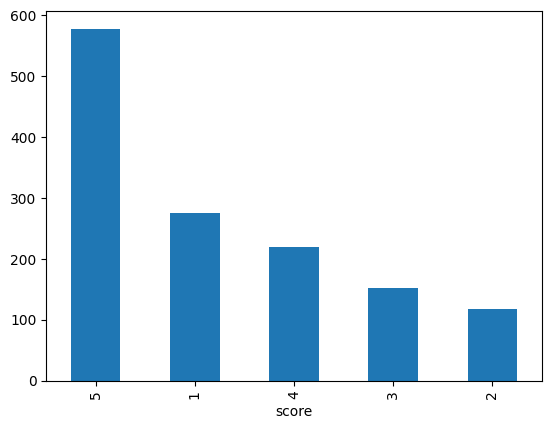

In [23]:
score = train_revUS['score'].value_counts()
print(score)
score.plot(kind='bar')

In [24]:
train_revUS['score'].mean()

3.5271779597915116

In [25]:
train_revUS['thumbsUpCount'].value_counts()

thumbsUpCount
1      162
2      153
0      140
3      101
4       62
      ... 
47       1
72       1
71       1
91       1
821      1
Name: count, Length: 273, dtype: int64

## Step A : Changing all the reviews into lowercase

In [9]:
train_revUS['cleaned_content'] = train_revUS['content'].apply(lambda x: x.lower())
train_revUS[['cleaned_content','content']].head(10)

cleaned_content  \
0   enter coupon in temu profile to get $100. temu...   
1   they are only cheap in the beginning and if yo...   
2   enter coupon in temu profile to get $100. upda...   
3   you can get cheap stuff which is great but the...   
4   the rating is only because i haven't gotten an...   
5   i like saving money. what i don't like is spam...   
6   it has a lot of neat things, yes, but there ar...   
7   the products i had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  i really was skeptical at first like everybody...   

                                              content  
0   Enter Coupon in temu profile to get $100. Temu...  
1   They are only cheap in the beginning and if yo...  
2   Enter Coupon in temu profile to get $100. Upda...  
3   You can get cheap stuff which is great BUT the...  
4   The rating is only because I haven't gotten an...  
5   I like saving money. What I don't like is spam...  
6   It has a lot of neat things, yes, but there ar...  
7   The products I had from them so far were great...  
9   read reviews and look at any photos you can. s...  
10  I really was skeptical at first like everybody...

## Step B : Apostrophe Lookup

In [10]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

    
train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: lookup_dict(x,apostrophe_dict))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get $100. temu...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get $100. upda...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because i have not gotten a...  
5   i like saving money. what i do not like is spa...  
6   it has a lot of neat things, yes, but there ar...  
7   the products i had from them so far were great...  
9   read reviews and look at any photos you can. s...  
10  i really was skeptical at first like everybody...

## Step C : Short Word Lookup

In [11]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: lookup_dict(x,short_word_dict))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get $100. temu...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get $100. upda...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because i have not gotten a...  
5   i like saving money. what i do not like is spa...  
6   it has a lot of neat things, yes, but there ar...  
7   the products i had from them so far were great...  
9   read reviews and look at any photos you can. s...  
10  i really was skeptical at first like everybody...

### Step D : Emoticon Lookup

In [12]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: lookup_dict(x,emoticon_dict))
train_revUS[['content','cleaned_content']].tail(10)

content  \
1383  Constant spam and promotions with hidden agend...   
1384  Great shopping experience. As with any shoppin...   
1385  Just placed my first 3 orders, so not sure wha...   
1386  good service for cheap goods. mostly no issues...   
1387  Originally, I gave Temu 5 stars because the pr...   
1388  Interface is annoying, makes you sit through l...   
1389  Amazing deals, but watch out for the NEVER END...   
1390  I give it 3 star. It's really cheap, but you h...   
1391  Love the app. Easy to get refunds. That said, ...   
1392  Data leak, had fraudulent phishing attempts wi...   

                                        cleaned_content  
1383  constant spam and promotions with hidden agend...  
1384  great shopping experience. as with any shoppin...  
1385  just placed my first 3 orders, so not sure wha...  
1386  good service for cheap goods. mostly no issues...  
1387  originally, i gave temu 5 stars because the pr...  
1388  interface is annoying, makes you sit through l...  
1389  amazing deals, but watch out for the never end...  
1390  i give it 3 star. it has / it is really cheap,...  
1391  love the app. easy to get refunds. that said, ...  
1392  data leak, had fraudulent phishing attempts wi...

### Step E : Replacing Special Characters with space and ReplacingPunctuations with space

In [13]:
train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get  100  temu...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get  100  upda...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because i have not gotten a...  
5   i like saving money  what i do not like is spa...  
6   it has a lot of neat things  yes  but there ar...  
7   the products i had from them so far were great...  
9   read reviews and look at any photos you can  s...  
10  i really was skeptical at first like everybody...

In [14]:
train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get  100  temu...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get  100  upda...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because i have not gotten a...  
5   i like saving money  what i do not like is spa...  
6   it has a lot of neat things  yes  but there ar...  
7   the products i had from them so far were great...  
9   read reviews and look at any photos you can  s...  
10  i really was skeptical at first like everybody...

## Step F : Replacing Numbers (integers) with space

In [15]:
train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get       temu...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get       upda...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because i have not gotten a...  
5   i like saving money  what i do not like is spa...  
6   it has a lot of neat things  yes  but there ar...  
7   the products i had from them so far were great...  
9   read reviews and look at any photos you can  s...  
10  i really was skeptical at first like everybody...

## Step G : Removing words whom length is 1

In [16]:
train_revUS['cleaned_content'] = train_revUS['cleaned_content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
train_revUS[['content','cleaned_content']].head(10)

content  \
0   Enter Coupon in temu profile to get $100. Temu...   
1   They are only cheap in the beginning and if yo...   
2   Enter Coupon in temu profile to get $100. Upda...   
3   You can get cheap stuff which is great BUT the...   
4   The rating is only because I haven't gotten an...   
5   I like saving money. What I don't like is spam...   
6   It has a lot of neat things, yes, but there ar...   
7   The products I had from them so far were great...   
9   read reviews and look at any photos you can. s...   
10  I really was skeptical at first like everybody...   

                                      cleaned_content  
0   enter coupon in temu profile to get temu exper...  
1   they are only cheap in the beginning and if yo...  
2   enter coupon in temu profile to get updates wi...  
3   you can get cheap stuff which is great but the...  
4   the rating is only because have not gotten any...  
5   like saving money what do not like is spammy a...  
6   it has lot of neat things yes but there are al...  
7   the products had from them so far were great a...  
9   read reviews and look at any photos you can so...  
10  really was skeptical at first like everybody e...

## Step I: Creating review tokens

In [17]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

train_revUS['content_tokens'] = train_revUS['cleaned_content'].apply(lambda x: word_tokenize(x))
train_revUS[['content','cleaned_content','content_tokens']].head()

content  \
0  Enter Coupon in temu profile to get $100. Temu...   
1  They are only cheap in the beginning and if yo...   
2  Enter Coupon in temu profile to get $100. Upda...   
3  You can get cheap stuff which is great BUT the...   
4  The rating is only because I haven't gotten an...   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   
2  enter coupon in temu profile to get updates wi...   
3  you can get cheap stuff which is great but the...   
4  the rating is only because have not gotten any...   

                                      content_tokens  
0  [enter, coupon, in, temu, profile, to, get, te...  
1  [they, are, only, cheap, in, the, beginning, a...  
2  [enter, coupon, in, temu, profile, to, get, up...  
3  [you, can, get, cheap, stuff, which, is, great...  
4  [the, rating, is, only, because, have, not, go...

## Step J: Remove stopwords 

In [18]:
train_revUS['content_token_filtered'] = train_revUS['content_tokens'].apply(lambda x: [word for word in x if not word in stop_words])
train_revUS[['content','cleaned_content','content_tokens','content_token_filtered']].head()

content  \
0  Enter Coupon in temu profile to get $100. Temu...   
1  They are only cheap in the beginning and if yo...   
2  Enter Coupon in temu profile to get $100. Upda...   
3  You can get cheap stuff which is great BUT the...   
4  The rating is only because I haven't gotten an...   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   
2  enter coupon in temu profile to get updates wi...   
3  you can get cheap stuff which is great but the...   
4  the rating is only because have not gotten any...   

                                      content_tokens  \
0  [enter, coupon, in, temu, profile, to, get, te...   
1  [they, are, only, cheap, in, the, beginning, a...   
2  [enter, coupon, in, temu, profile, to, get, up...   
3  [you, can, get, cheap, stuff, which, is, great...   
4  [the, rating, is, only, because, have, not, go...   

                              content_token_filtered  
0  [enter, coupon, temu, profile, get, temu, expe...  
1  [cheap, beginning, shopped, tell, getting, dea...  
2  [enter, coupon, temu, profile, get, updates, s...  
3  [get, cheap, stuff, great, keep, trying, get, ...  
4  [rating, gotten, anything, yet, wanted, recomm...

## Step K: Stemming 

In [19]:
# Importing library for stemming
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

train_revUS['content_stemmed'] = train_revUS['content_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
train_revUS[['content','cleaned_content','content_tokens','content_token_filtered','content_stemmed']].head()

content  \
0  Enter Coupon in temu profile to get $100. Temu...   
1  They are only cheap in the beginning and if yo...   
2  Enter Coupon in temu profile to get $100. Upda...   
3  You can get cheap stuff which is great BUT the...   
4  The rating is only because I haven't gotten an...   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   
2  enter coupon in temu profile to get updates wi...   
3  you can get cheap stuff which is great but the...   
4  the rating is only because have not gotten any...   

                                      content_tokens  \
0  [enter, coupon, in, temu, profile, to, get, te...   
1  [they, are, only, cheap, in, the, beginning, a...   
2  [enter, coupon, in, temu, profile, to, get, up...   
3  [you, can, get, cheap, stuff, which, is, great...   
4  [the, rating, is, only, because, have, not, go...   

                              content_token_filtered  \
0  [enter, coupon, temu, profile, get, temu, expe...   
1  [cheap, beginning, shopped, tell, getting, dea...   
2  [enter, coupon, temu, profile, get, updates, s...   
3  [get, cheap, stuff, great, keep, trying, get, ...   
4  [rating, gotten, anything, yet, wanted, recomm...   

                                     content_stemmed  
0  enter coupon temu profil get temu experi good ...  
1  cheap begin shop tell get deal offer coupon pr...  
2  enter coupon temu profil get updat semi regula...  
3  get cheap stuff great keep tri get spam contac...  
4  rate gotten anyth yet want recommend easier wa...

## Step L : Lemmatization 

In [21]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

train_revUS['content_lemmatized'] = train_revUS['content_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
train_revUS[['content','cleaned_content','content_tokens','content_token_filtered','content_stemmed','content_lemmatized']].head()

content  \
0  Enter Coupon in temu profile to get $100. Temu...   
1  They are only cheap in the beginning and if yo...   
2  Enter Coupon in temu profile to get $100. Upda...   
3  You can get cheap stuff which is great BUT the...   
4  The rating is only because I haven't gotten an...   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   
2  enter coupon in temu profile to get updates wi...   
3  you can get cheap stuff which is great but the...   
4  the rating is only because have not gotten any...   

                                      content_tokens  \
0  [enter, coupon, in, temu, profile, to, get, te...   
1  [they, are, only, cheap, in, the, beginning, a...   
2  [enter, coupon, in, temu, profile, to, get, up...   
3  [you, can, get, cheap, stuff, which, is, great...   
4  [the, rating, is, only, because, have, not, go...   

                              content_token_filtered  \
0  [enter, coupon, temu, profile, get, temu, expe...   
1  [cheap, beginning, shopped, tell, getting, dea...   
2  [enter, coupon, temu, profile, get, updates, s...   
3  [get, cheap, stuff, great, keep, trying, get, ...   
4  [rating, gotten, anything, yet, wanted, recomm...   

                                     content_stemmed  \
0  enter coupon temu profil get temu experi good ...   
1  cheap begin shop tell get deal offer coupon pr...   
2  enter coupon temu profil get updat semi regula...   
3  get cheap stuff great keep tri get spam contac...   
4  rate gotten anyth yet want recommend easier wa...   

                                  content_lemmatized  
0  enter coupon temu profile get temu experience ...  
1  cheap beginning shopped tell getting deal offe...  
2  enter coupon temu profile get update semi regu...  
3  get cheap stuff great keep trying get spam con...  
4  rating gotten anything yet wanted recommend ea...

## Step M: Text Analysis

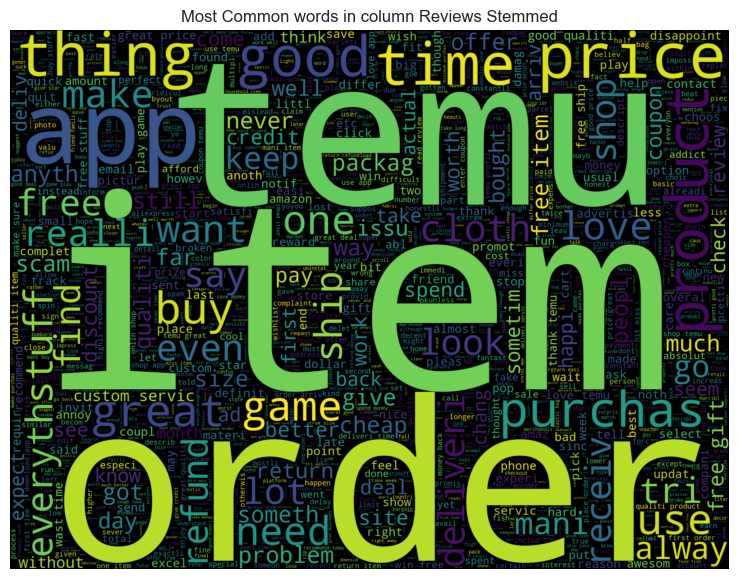

In [346]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
from wordcloud import WordCloud

all_words = ' '.join([text for text in train_revUS['content_stemmed']])
wordcloud = WordCloud( random_state=1, max_words = 2000, width =2000, height = 1500).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Reviews Stemmed")
plt.show()

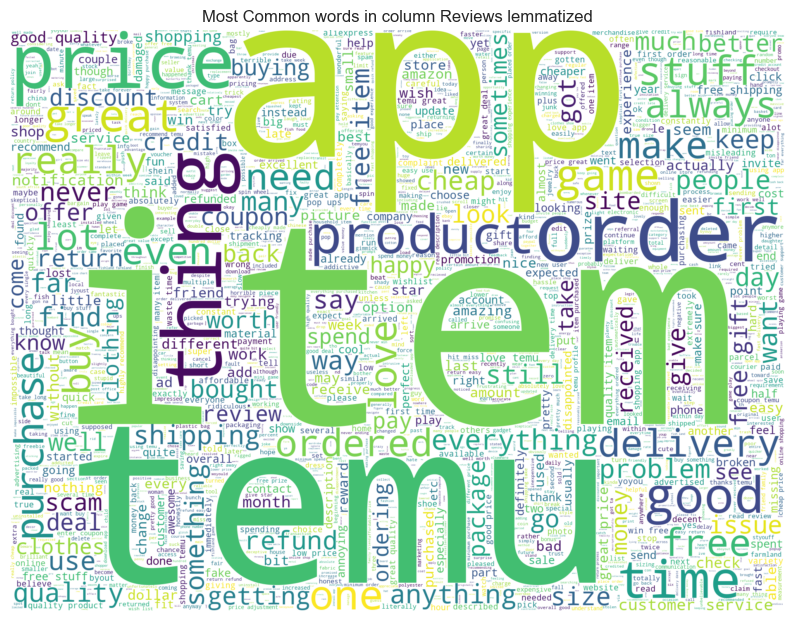

In [191]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words_filtered = train_revUS['content_lemmatized']

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Reviews lemmatized")
plt.show()

In [194]:
train_revUS.head(3)

userName  \
0  Temu Coupon Code- afg631ᒿ7   
1                LeeLee Is Me   
2       Temu Coupon- afg631ᒿ7   

                                             content  score  thumbsUpCount  \
0  Enter Coupon in temu profile to get $100. Temu...      4             48   
1  They are only cheap in the beginning and if yo...      2              8   
2  Enter Coupon in temu profile to get $100. Upda...      3             13   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   
2  enter coupon in temu profile to get updates wi...   

                                      content_tokens  \
0  [enter, coupon, in, temu, profile, to, get, te...   
1  [they, are, only, cheap, in, the, beginning, a...   
2  [enter, coupon, in, temu, profile, to, get, up...   

                              content_token_filtered  \
0  [enter, coupon, temu, profile, get, temu, expe...   
1  [cheap, beginning, shopped, tell, getting, dea...   
2  [enter, coupon, temu, profile, get, updates, s...   

                                     content_stemmed  \
0  enter coupon temu profil get temu experi good ...   
1  cheap begin shop tell get deal offer coupon pr...   
2  enter coupon temu profil get updat semi regula...   

                                  content_lemmatized  
0  enter coupon temu profile get temu experience ...  
1  cheap beginning shopped tell getting deal offe...  
2  enter coupon temu profile get update semi regu...

In [205]:
train_revUS.shape

(1343, 9)

In [206]:
train_revUS.to_csv("reviews_US_lematized_1343.csv", index=False)

# Extracting Features from Cleaned reviews

In [40]:
import pandas as pd

data = pd.read_csv('reviews_US_lematized_1343.csv')
print(data.shape)
data.head(2)

(1343, 9)


userName  \
0  Temu Coupon Code- afg631ᒿ7   
1                LeeLee Is Me   

                                             content  score  thumbsUpCount  \
0  Enter Coupon in temu profile to get $100. Temu...      4             48   
1  They are only cheap in the beginning and if yo...      2              8   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   

                                      content_tokens  \
0  ['enter', 'coupon', 'in', 'temu', 'profile', '...   
1  ['they', 'are', 'only', 'cheap', 'in', 'the', ...   

                              content_token_filtered  \
0  ['enter', 'coupon', 'temu', 'profile', 'get', ...   
1  ['cheap', 'beginning', 'shopped', 'tell', 'get...   

                                     content_stemmed  \
0  enter coupon temu profil get temu experi good ...   
1  cheap begin shop tell get deal offer coupon pr...   

                                  content_lemmatized  
0  enter coupon temu profile get temu experience ...  
1  cheap beginning shopped tell getting deal offe...

In [41]:
words = pd.read_excel('Positive and Negative Word List.xlsx')
words

Unnamed: 0 Negative Sense Word List Positive Sense Word List
0              0                      NaN                      NaN
1              1                 abnormal                     able
2              2                  abolish                abundance
3              3               abominable               accelerate
4              4               abominably                   accept
...          ...                      ...                      ...
4716        4716                   zenana                      NaN
4717        4717                   zephyr                      NaN
4718        4718                     zero                      NaN
4719        4719                      zol                      NaN
4720        4720                   zombie                      NaN

[4721 rows x 3 columns]

In [42]:
words =words.drop(columns=['Unnamed: 0'])
words =words.dropna()
words

Negative Sense Word List Positive Sense Word List
1                    abnormal                     able
2                     abolish                abundance
3                  abominable               accelerate
4                  abominably                   accept
5                   abominate                  acclaim
...                       ...                      ...
4692                 wrongful                     zoom
4693                  wrongly                  zorbing
4694                  wrought                     zouk
4695                 xanthoma                   zounds
4696          xenophobiaxyrid                    zowie

[4696 rows x 2 columns]

Sentiment Classification Results:
                                        cleaned_content  score sentiment
0     enter coupon in temu profile to get temu exper...      4  positive
1     they are only cheap in the beginning and if yo...      2  negative
2     enter coupon in temu profile to get updates wi...      3  positive
3     you can get cheap stuff which is great but the...      2  negative
4     the rating is only because have not gotten any...      1  negative
...                                                 ...    ...       ...
1338  interface is annoying makes you sit through li...      2  negative
1339  amazing deals but watch out for the never endi...      5  positive
1340  give it star it has it is really cheap byout y...      3  positive
1341  love the app easy to get refunds that said be ...      4  positive
1342  data leak had fraudulent phishing attempts wit...      1  negative

[1343 rows x 3 columns]
Counter({'positive': 950, 'negative': 393})


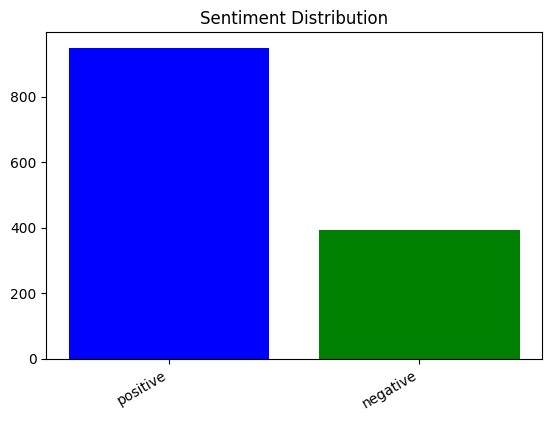

In [44]:
import pandas as pd
import string
from collections import Counter
import matplotlib.pyplot as plt


words_df = words
reviews_df = pd.read_csv('reviews_US_lematized_1343.csv')

# Function to clean and organize words from the respective columns
def get_words_set(df,column_name):
    word = set()
    for word_list in df[column_name].dropna():
        if isinstance(word_list, str):
            words.update(word_list.split())
    return word

# Extract positive and negative words
negative_words = get_words_set(words_df, 'Negative Sense Word List')
positive_words = get_words_set(words_df, 'Positive Sense Word List')

# Function to classify the sentiment of a review
def classify_sentiment(row, positive_words, negative_words):
    review = row['cleaned_content']
    score = row['score']
    review_words = review.lower().translate(str.maketrans('', '', string.punctuation)).split()
    positive_count = sum(1 for word in review_words if word in positive_words)
    negative_count = sum(1 for word in review_words if word in negative_words)
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        if score < 3:
            return 'negative'
        elif score >= 3:
            return 'positive'



# Apply the sentiment classification to each review in the DataFrame
reviews_df['sentiment'] = reviews_df.apply(lambda row: classify_sentiment(row, positive_words, negative_words), axis=1)

# Count the sentiment results
sentiment_counts = Counter(reviews_df['sentiment'])

# Print the sentiment classification resultsreviews_df
print("Sentiment Classification Results:")
print(reviews_df[['cleaned_content', 'score', 'sentiment']])
print(sentiment_counts)

data =reviews_df
# Plot the sentiment distribution
fig, ax1 = plt.subplots()
ax1.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['blue', 'green'])
fig.autofmt_xdate()
plt.title('Sentiment Distribution')
plt.show()

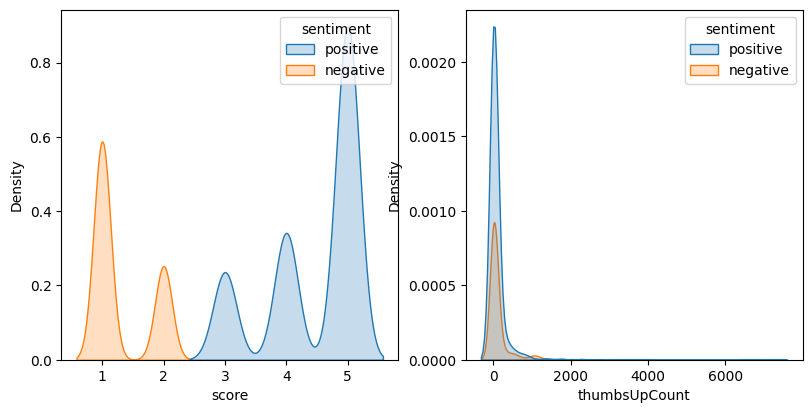

In [45]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = data.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)
    sns.kdeplot(data=data, x=col, hue='sentiment', fill=True)

In [46]:
data['sentiment'].value_counts(dropna=False)

sentiment
positive    950
negative    393
Name: count, dtype: int64

In [47]:
data.shape

(1343, 10)

In [48]:
data['target'] = data['sentiment'].apply(lambda x: 1 if x == "positive" else 0)

data.head(2)

userName  \
0  Temu Coupon Code- afg631ᒿ7   
1                LeeLee Is Me   

                                             content  score  thumbsUpCount  \
0  Enter Coupon in temu profile to get $100. Temu...      4             48   
1  They are only cheap in the beginning and if yo...      2              8   

                                     cleaned_content  \
0  enter coupon in temu profile to get temu exper...   
1  they are only cheap in the beginning and if yo...   

                                      content_tokens  \
0  ['enter', 'coupon', 'in', 'temu', 'profile', '...   
1  ['they', 'are', 'only', 'cheap', 'in', 'the', ...   

                              content_token_filtered  \
0  ['enter', 'coupon', 'temu', 'profile', 'get', ...   
1  ['cheap', 'beginning', 'shopped', 'tell', 'get...   

                                     content_stemmed  \
0  enter coupon temu profil get temu experi good ...   
1  cheap begin shop tell get deal offer coupon pr...   

                                  content_lemmatized sentiment  target  
0  enter coupon temu profile get temu experience ...  positive       1  
1  cheap beginning shopped tell getting deal offe...  negative       0

In [49]:
data['target'].value_counts(dropna=False)

target
1    950
0    393
Name: count, dtype: int64

In [ ]:
df.to_csv('temu_US_1343_target.csv', index=False)

score  thumbsUpCount    target
score          1.000000      -0.039620  0.903291
thumbsUpCount -0.039620       1.000000 -0.034069
target         0.903291      -0.034069  1.000000

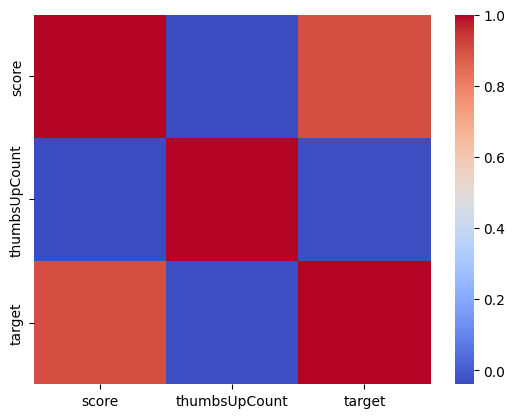

In [50]:
# Sélectionner uniquement les colonnes numériques
numeric_subset = data.select_dtypes(include=['number'])

# Calculer la corrélation pour les colonnes numériques
correlation_matrix = numeric_subset.corr()

#lets visualize the correlation matrix using seaborn
sns.heatmap(correlation_matrix,cmap='coolwarm')
correlation_matrix

In [111]:
# Sélectionner aléatoirement 10 000 tweets positifs
reviews_positifs = data[data['target'] == 1].sample(n=300, random_state=42)
reviews_negatifs = data[data['target'] == 0].sample(n=300, random_state=42)

# Concaténer les tweets positifs et négatifs sélectionnés
reviews = pd.concat([reviews_positifs, reviews_negatifs])

# Réinitialiser les index
reviews = reviews.reset_index(drop=True)
reviews.shape

(600, 11)

In [112]:
df.to_csv('temu_US_600__target.csv', index=False)

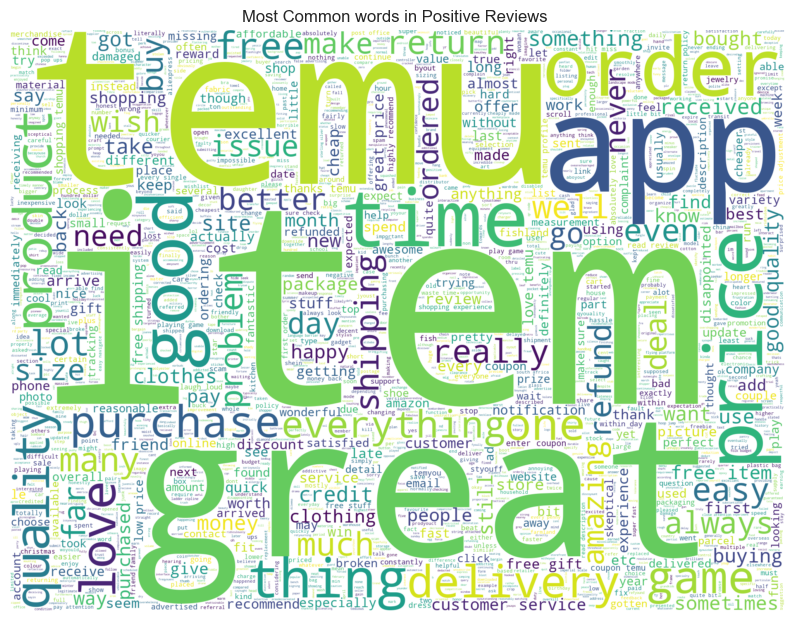

In [342]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words_filtered = reviews[reviews['target'] == 1]['content_lemmatized']

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Positive Reviews ")
plt.show()

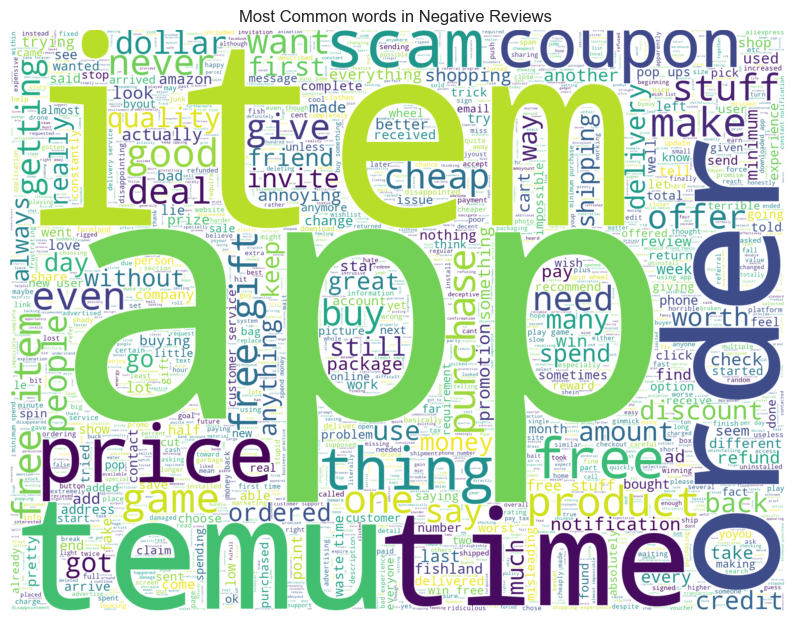

In [343]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

words_filtered = reviews[reviews['target'] == 0]['content_lemmatized']

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =2000, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in Negative Reviews ")
plt.show()

### Features Extraction

In [303]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [231]:
df = pd.read_csv('temu_US_600__target.csv')
df.head()

userName                                            content  \
0          Peter Lukashal  i like it. you can find many things that are n...   
1           Crystal Pernu  I live the variety and allot of the time the p...   
2          Deborah Eisele  Great customer service, great quality clothing...   
3              Dawn Baker  Love the household items .... they are my fix-...   
4  senga labyalo utiripse  experiencing to order online, TEMU is 1 of the...   

   score  thumbsUpCount                                    cleaned_content  \
0      5            305  like it you can find many things that are not ...   
1      5              4  live the variety and allot of the time the pri...   
2      4             18  great customer service great quality clothing ...   
3      5              3  love the household items they are my fix me up...   
4      5              6  experiencing to order online temu is of the be...   

                                      content_tokens  \
0  ['like', 'it', 'you', 'can', 'find', 'many', '...   
1  ['live', 'the', 'variety', 'and', 'allot', 'of...   
2  ['great', 'customer', 'service', 'great', 'qua...   
3  ['love', 'the', 'household', 'items', 'they', ...   
4  ['experiencing', 'to', 'order', 'online', 'tem...   

                              content_token_filtered  \
0  ['like', 'find', 'many', 'things', 'available'...   
1  ['live', 'variety', 'allot', 'time', 'prices',...   
2  ['great', 'customer', 'service', 'great', 'qua...   
3  ['love', 'household', 'items', 'fix', 'ups', '...   
4  ['experiencing', 'order', 'online', 'temu', 'b...   

                                     content_stemmed  \
0  like find mani thing avail anywher els avail e...   
1  live varieti allot time price better place lik...   
2  great custom servic great qualiti cloth jewelr...   
3  love household item fix up ive get get free it...   
4  experienc order onlin temu best trust lot scam...   

                                  content_lemmatized  target sentiment  
0  like find many thing available anywhere else a...       1  positive  
1  live variety allot time price better place lik...       1  positive  
2  great customer service great quality clothing ...       1  positive  
3  love household item fix ups ive getting get fr...       1  positive  
4  experiencing order online temu best trust lot ...       1  positive

In [170]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content_lemmatized'] , df['target'], test_size=0.25, random_state=42)

In [363]:
# Create BOW vectorizer to convert text data into numerical features
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df['content_lemmatized'])

## Création du DataFrame
df_vectorized = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
## Affichage du DataFrame
print("\n\n BOW :\n")
df_vectorized.head()



 BOW :



aaree  ability  abit  able  aboyout  abroad  absoloute  absolute  \
0      0        0     0     0        0       0          0         0   
1      0        0     0     0        0       0          0         0   
2      0        0     0     0        0       0          0         0   
3      0        0     0     0        0       0          0         0   
4      0        0     0     0        0       0          0         0   

   absolutely  abused  ...  youve  yoyou  yoyour  yr  yup  zero  zipline  \
0           0       0  ...      0      0       0   0    0     0        0   
1           0       0  ...      0      0       0   0    0     0        0   
2           0       0  ...      0      0       0   0    0     0        0   
3           0       0  ...      0      0       0   0    0     0        0   
4           0       0  ...      0      0       0   0    0     0        0   

   ziplines  zipped  zoom  
0         0       0     0  
1         0       0     0  
2         0       0     0  
3         0       0     0  
4         0       0     0  

[5 rows x 3228 columns]

In [353]:
# Create TF-IDF vectorizer to convert text data into numerical features
vectorizer_tfidf =  TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df['content_lemmatized'])

## Création du DataFrame
df_vectorized = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
## Affichage du DataFrame
print("\n\n TF-IDF :\n")
df_vectorized.head()



 TF-IDF :



aaree  ability  abit  able  aboyout  abroad  absoloute  absolute  \
0    0.0      0.0   0.0   0.0      0.0     0.0        0.0       0.0   
1    0.0      0.0   0.0   0.0      0.0     0.0        0.0       0.0   
2    0.0      0.0   0.0   0.0      0.0     0.0        0.0       0.0   
3    0.0      0.0   0.0   0.0      0.0     0.0        0.0       0.0   
4    0.0      0.0   0.0   0.0      0.0     0.0        0.0       0.0   

   absolutely  abused  ...  youve  yoyou  yoyour   yr  yup  zero  zipline  \
0         0.0     0.0  ...    0.0    0.0     0.0  0.0  0.0   0.0      0.0   
1         0.0     0.0  ...    0.0    0.0     0.0  0.0  0.0   0.0      0.0   
2         0.0     0.0  ...    0.0    0.0     0.0  0.0  0.0   0.0      0.0   
3         0.0     0.0  ...    0.0    0.0     0.0  0.0  0.0   0.0      0.0   
4         0.0     0.0  ...    0.0    0.0     0.0  0.0  0.0   0.0      0.0   

   ziplines  zipped  zoom  
0       0.0     0.0   0.0  
1       0.0     0.0   0.0  
2       0.0     0.0   0.0  
3       0.0     0.0   0.0  
4       0.0     0.0   0.0  

[5 rows x 3228 columns]

In [306]:
# Create 1-grammes vectorizer to convert text data into numerical features
vectorizer_1_gram = CountVectorizer(ngram_range=(1, 1))
X_1_gram = vectorizer_1_gram.fit_transform(df['content_lemmatized'])

## Création du DataFrame
df_vectorized = pd.DataFrame(X_1_gram.toarray(), columns=vectorizer_1_gram.get_feature_names_out())
## Affichage du DataFrame
print("\n\n 1-gram :\n")
df_vectorized.head()



 1-gram :



aaree  ability  abit  able  aboyout  abroad  absoloute  absolute  \
0      0        0     0     0        0       0          0         0   
1      0        0     0     0        0       0          0         0   
2      0        0     0     0        0       0          0         0   
3      0        0     0     0        0       0          0         0   
4      0        0     0     0        0       0          0         0   

   absolutely  abused  ...  youve  yoyou  yoyour  yr  yup  zero  zipline  \
0           0       0  ...      0      0       0   0    0     0        0   
1           0       0  ...      0      0       0   0    0     0        0   
2           0       0  ...      0      0       0   0    0     0        0   
3           0       0  ...      0      0       0   0    0     0        0   
4           0       0  ...      0      0       0   0    0     0        0   

   ziplines  zipped  zoom  
0         0       0     0  
1         0       0     0  
2         0       0     0  
3         0       0     0  
4         0       0     0  

[5 rows x 3228 columns]

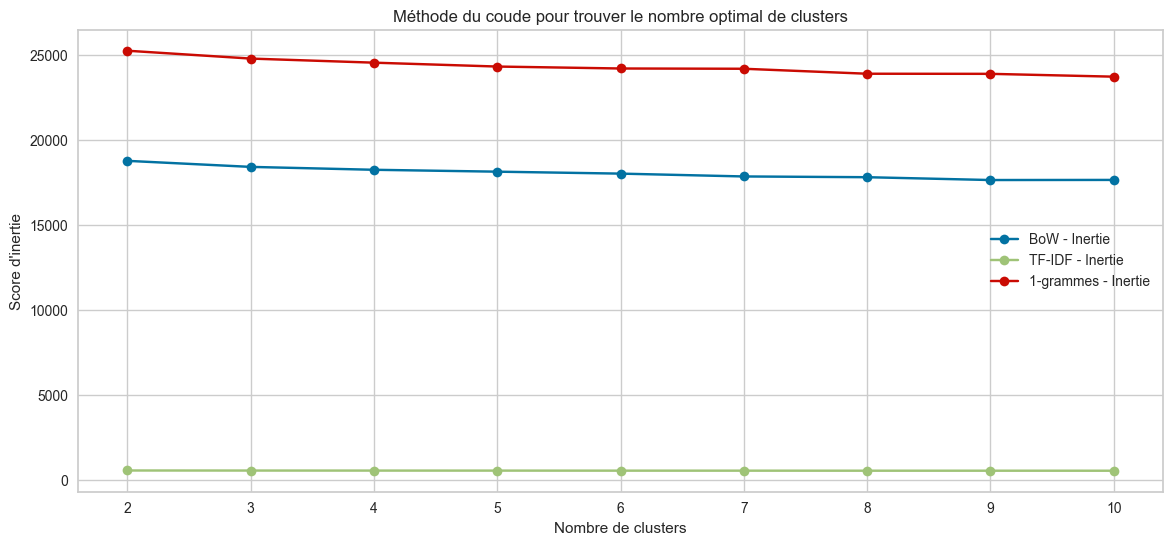

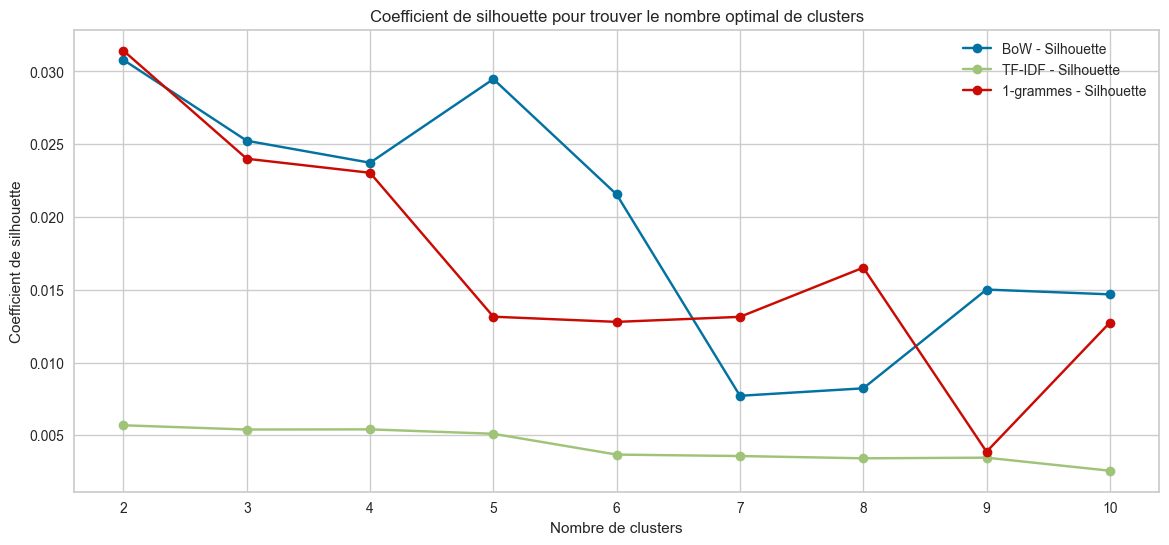

silhouette_scores_all


Cluster       BoW    TF-IDF  1-grammes
0        2  0.030790  0.005689   0.031422
1        3  0.025237  0.005397   0.024001
2        4  0.023727  0.005409   0.023036
3        5  0.029474  0.005105   0.013149
4        6  0.021547  0.003675   0.012793
5        7  0.007715  0.003576   0.013139
6        8  0.008228  0.003420   0.016520
7        9  0.015014  0.003464   0.003871
8       10  0.014685  0.002567   0.012741

In [354]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Définir une liste de vecteurs et noms correspondants
vecteurs = [X_bow, X_tfidf, X_1_gram]
noms_vecteurs = ['BoW',  'TF-IDF', '1-grammes']
nombre_clusters = range(2, 11) 
# Initialiser des listes pour stocker les scores d'inertie et de silhouette pour chaque méthode
inertia_scores_all = []
silhouette_scores_all = []

# Calculer le score d'inertie et de silhouette pour chaque méthode
for X, nom_vecteur in zip(vecteurs, noms_vecteurs):
    inertia_scores, silhouette_scores = [], []
    nombre_clusters = range(2, 11) 
    for k in nombre_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia_scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    inertia_scores_all.append((nom_vecteur, inertia_scores))
    silhouette_scores_all.append((nom_vecteur, silhouette_scores))

# Tracer les graphiques
plt.figure(figsize=(14, 6))

# Graphique d'inertie
for nom_vecteur, inertia_scores in inertia_scores_all:
    plt.plot(nombre_clusters, inertia_scores, marker='o', label=f'{nom_vecteur} - Inertie')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score d\'inertie')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.legend()

# Graphique de silhouette
plt.figure(figsize=(14, 6))
for nom_vecteur, silhouette_scores in silhouette_scores_all:
    plt.plot(nombre_clusters, silhouette_scores, marker='o', label=f'{nom_vecteur} - Silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.title('Coefficient de silhouette pour trouver le nombre optimal de clusters')
plt.legend()

plt.show()


# Préparer les données sous forme de liste de dictionnaires
print("silhouette_scores_all")
rows = []
for cluster in nombre_clusters:
    row = {'Cluster': cluster}
    for label, values in silhouette_scores_all:
        row[label] = values[cluster - 2]
    rows.append(row)

# Créer la DataFrame
sil = pd.DataFrame(rows)
sil


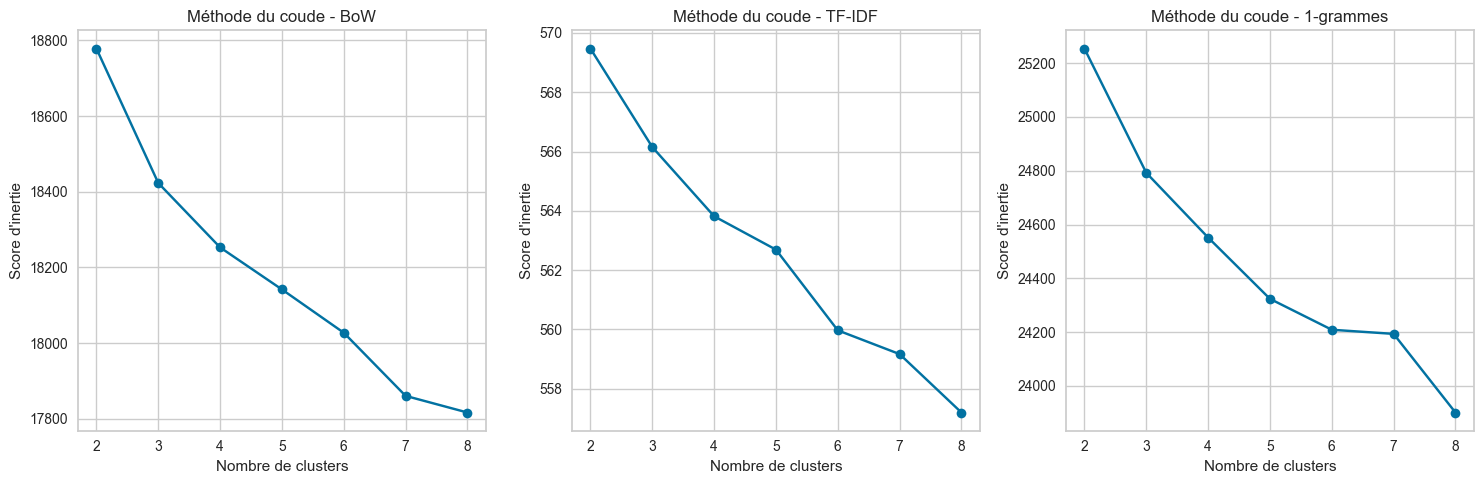

Cluster       BoW    TF-IDF  1-grammes
0        2  0.030790  0.005689   0.031422
1        3  0.025237  0.005397   0.024001
2        4  0.023727  0.005409   0.023036
3        5  0.029474  0.005105   0.013149
4        6  0.021547  0.003675   0.012793
5        7  0.007715  0.003576   0.013139
6        8  0.008228  0.003420   0.016520
7        9  0.015014  0.003464   0.003871
8       10  0.014685  0.002567   0.012741

In [356]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Définir une liste de nombres de clusters à tester
nombre_clusters = range(2, 9)  # Commence à 2 pour le coefficient de silhouette

# Initialiser des listes pour stocker les scores de silhouette pour chaque méthode
inertia_scores_all = []

# Calculer le score de silhouette pour chaque nombre de clusters pour chaque méthode
for X, nom_vecteur in zip([ X_bow, X_tfidf, X_1_gram ],
                          ['BoW',  'TF-IDF','1-grammes' ]):
    inertia_scores = []
    for k in nombre_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia_scores.append(kmeans.inertia_)
    inertia_scores_all.append((nom_vecteur, inertia_scores))

# Tracer les graphiques
plt.figure(figsize=(15, 5))

for i, (nom_vecteur, inertia_scores) in enumerate(inertia_scores_all, 1):
    plt.subplot(1, 3, i)
    plt.plot(nombre_clusters, inertia_scores, marker='o')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Score d\'inertie')
    plt.title(f'Méthode du coude - {nom_vecteur}')

plt.tight_layout()
plt.show()


# Créer la DataFrame
sil = pd.DataFrame(rows)
sil

In [357]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supposons que vous avez une liste de documents
documents = df['content_lemmatized']

# Définir les différentes méthodes de vectorisation
vectorizers = [
    ('BoW', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('1-grammes', CountVectorizer(ngram_range=(1, 1))),
    # ('2-grammes', CountVectorizer(ngram_range=(2, 2))),
    # ('3-grammes', CountVectorizer(ngram_range=(3, 3)))
]

# Stocker les scores de silhouette pour chaque méthode et nombre de clusters
scores = []

# Parcourir chaque méthode de vectorisation
for name, vectorizer in vectorizers:
    # Vectoriser les documents
    X = vectorizer.fit_transform(documents)
    
    for num_clusters in range(2, 6):
        # Appliquer KMeans
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(X)
        
        # Prédire les labels des clusters
        labels = kmeans.labels_
        
        # Calculer le score de silhouette
        score = silhouette_score(X, labels)
        
        # Ajouter le score à la liste
        scores.append((name, num_clusters, score))

# Créer un DataFrame pandas pour afficher les scores
df_scores = pd.DataFrame(scores, columns=['Vectorizer', 'Num_clusters', 'Silhouette_score'])


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

In [358]:

# Trouver le vectorizer avec le meilleur score de silhouette
best_vectorizer = df_scores.loc[df_scores['Silhouette_score'].idxmax()]

print("\nMeilleur vectorizer:")
print("Vectorizer:", best_vectorizer['Vectorizer'])
print("Nombre de clusters:", best_vectorizer['Num_clusters'])
print("Score de silhouette:", best_vectorizer['Silhouette_score'])

# Afficher le tableau des scores
df_scores


Meilleur vectorizer:
Vectorizer: BoW
Nombre de clusters: 2
Score de silhouette: 0.03142196235567035


Vectorizer  Num_clusters  Silhouette_score
0         BoW             2          0.031422
1         BoW             3          0.024001
2         BoW             4          0.023036
3         BoW             5          0.013149
4      TF-IDF             2          0.005689
5      TF-IDF             3          0.005397
6      TF-IDF             4          0.005409
7      TF-IDF             5          0.005105
8   1-grammes             2          0.031422
9   1-grammes             3          0.024001
10  1-grammes             4          0.023036
11  1-grammes             5          0.013149

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


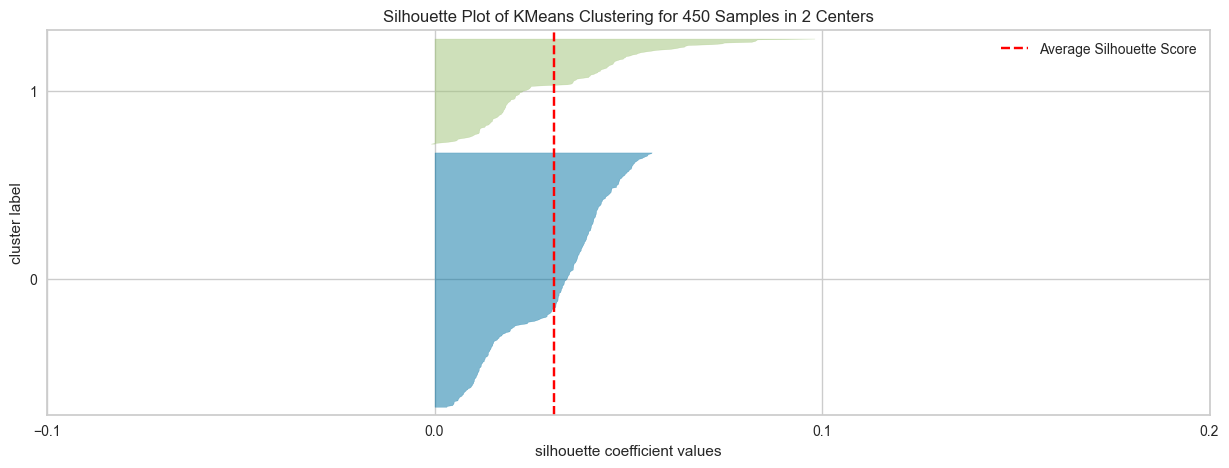

In [359]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer


# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

# First subplot for n_clusters_2
km1 = KMeans(n_clusters=2, random_state=42)
visualizer1 = SilhouetteVisualizer(km1, colors='yellowbrick')
visualizer1.fit(X_bow)
visualizer1.finalize()  # Finalize the plot

# # Show the plots
# plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

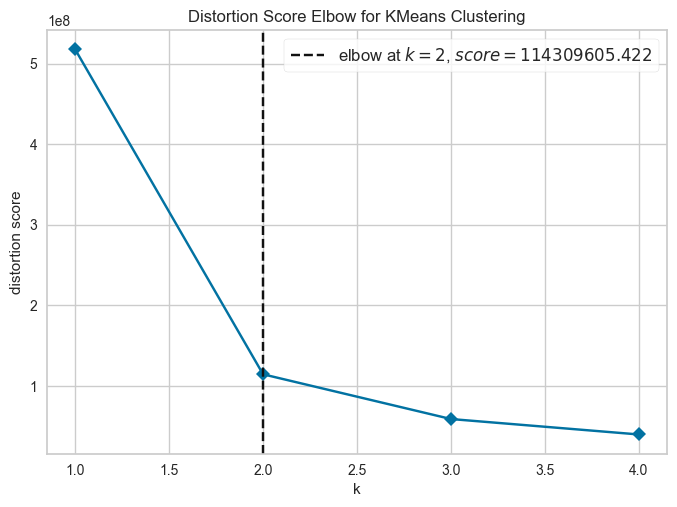

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters           WSS
0         2  1.143096e+08
1         3  5.878387e+07
2         4  3.962179e+07
3         5  3.277215e+07
4         6  2.690296e+07

In [368]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import sklearn.cluster as cluster
# Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5), timings=False)
visualizer.fit(X_bow.toarray())        # Fit the data to the visualizer
visualizer.show() 

K = range(2,7)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(X_bow)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


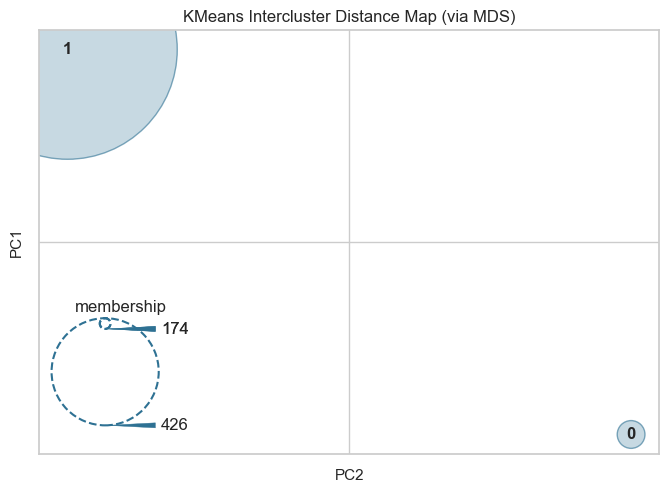

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [365]:
from yellowbrick.cluster import InterclusterDistance
# trying 2 centers for Kmeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_bow)
# Instantiate visualizer
visualizer_int_clust = InterclusterDistance(kmeans)
visualizer_int_clust.fit(X_bow)        # Fit the data to the visualizer
visualizer_int_clust.show()

2 clusters using KMeans shows good intercluster distance. Meaning that 2 clusters seperates the data into reasonably distinct groups.

### Data visualization using PCA

Nombre de composantes calculées :  2


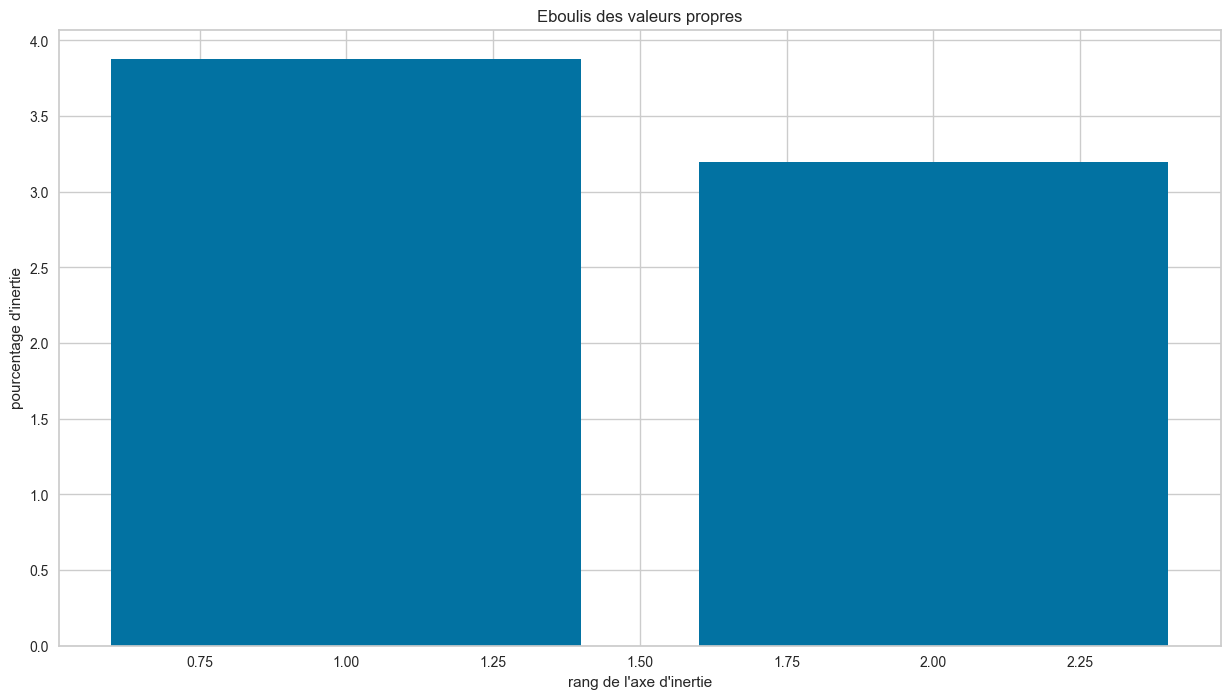

In [366]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    # plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

# choix du nombre de composantes à calculer vu qu'on a trois parametres
n_comp = 2

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(X_bow.toarray())
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


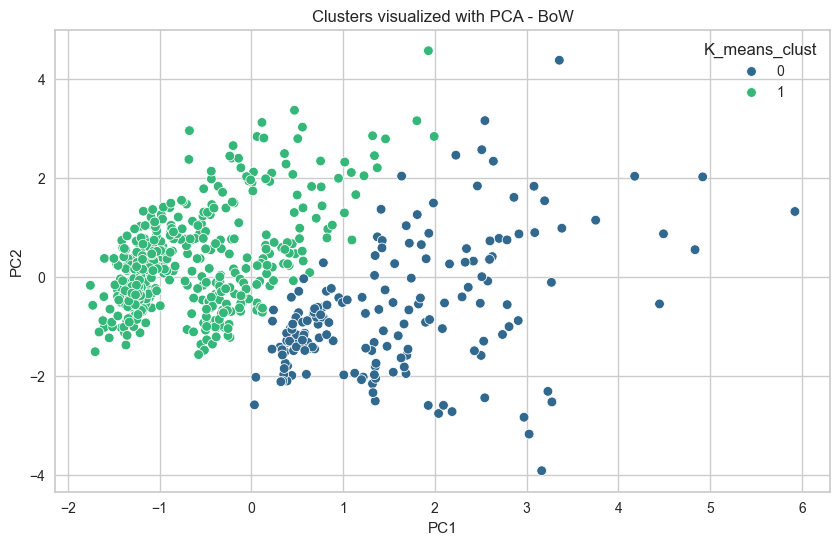

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


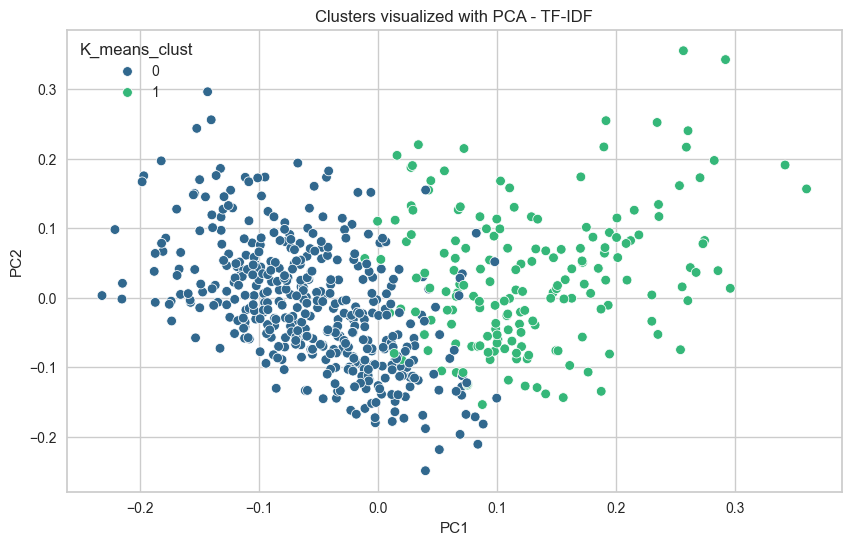

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


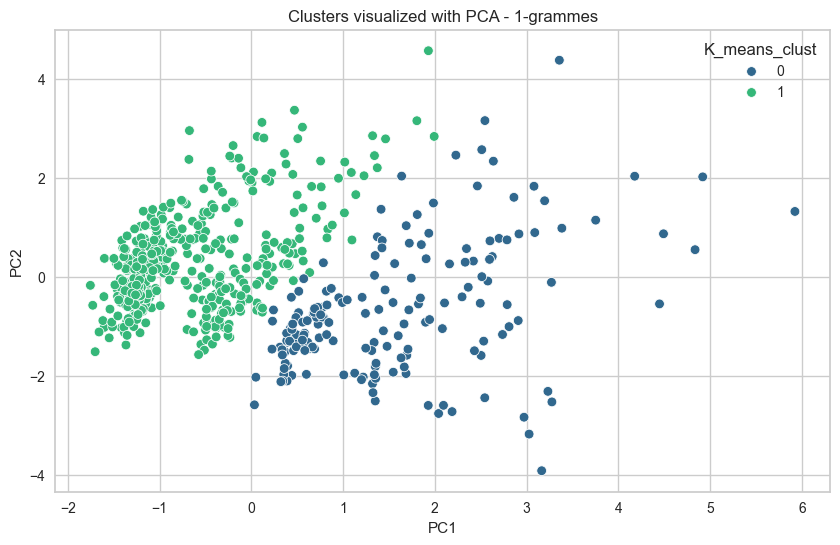

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


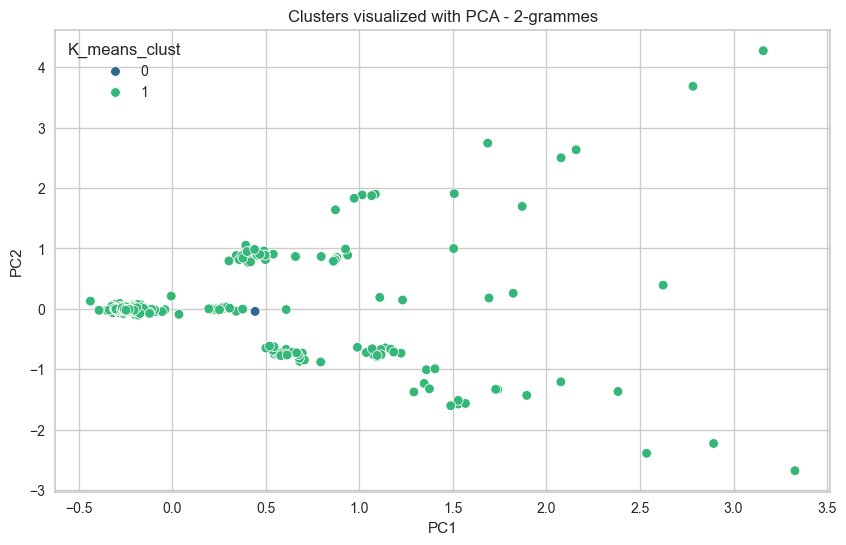

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


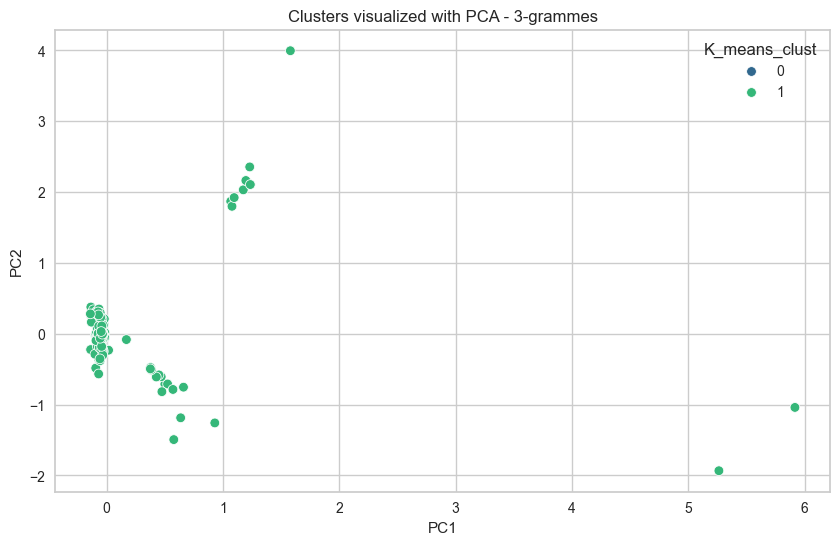

In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Charger le DataFrame
# df = pd.read_csv('temu_US_1343_target.csv')

# Ajouter une colonne de texte d'exemple pour la vectorisation
data = df["content_lemmatized"]
# Méthodes de vectorisation
vectorizers = [
    ('BoW', CountVectorizer()),
    ('TF-IDF', TfidfVectorizer()),
    ('1-grammes', CountVectorizer(ngram_range=(1, 1))),
    ('2-grammes', CountVectorizer(ngram_range=(2, 2))),
    ('3-grammes', CountVectorizer(ngram_range=(3, 3)))
]

# Nombre de clusters
num_clusters = 2

for name, vectorizer in vectorizers:
    # Vectorisation des données textuelles
    X_train_vectorized = vectorizer.fit_transform(df['content_lemmatized'])

    # Vérification de la correspondance des longueurs
    assert len(X_train_vectorized.toarray()) == len(df), "Les longueurs des données vectorisées et du DataFrame ne correspondent pas."

    # PCA transformation
    pca = PCA(n_components=2).fit(X_train_vectorized.toarray())
    Xk_projected = pca.transform(X_train_vectorized.toarray())

    # Convertir le résultat de la PCA en DataFrame
    pca_df = pd.DataFrame(Xk_projected, columns=['PC1', 'PC2'])

    # Appliquer KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X_train_vectorized.toarray())

    # Ajouter les labels des clusters au DataFrame original et au DataFrame PCA
    df['K_means_clust'] = kmeans.labels_
    pca_df['K_means_clust'] = kmeans.labels_

    # Visualisation des clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='K_means_clust', palette='viridis')
    plt.title(f'Clusters visualized with PCA - {name}')
    plt.show()


C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


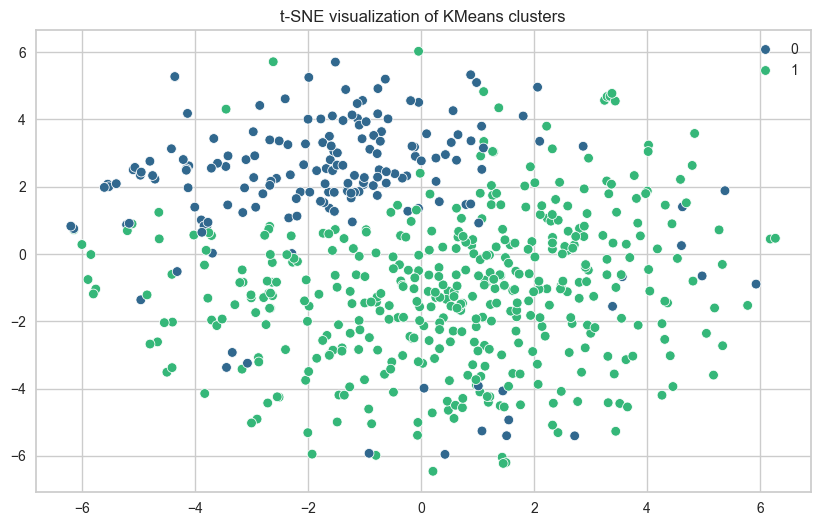

In [389]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Load data (you can replace this with your own dataset)
data = df['content_lemmatized']

# Create a Bag of Words representation
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_bow = vectorizer.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_bow)
labels = kmeans.labels_

# Ajouter les labels des clusters au DataFrame original et au DataFrame PCA
df['K_means_clust'] = kmeans.labels_


# t-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_bow.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='viridis')
plt.title('t-SNE visualization of KMeans clusters')
plt.show()



In [390]:
df['K_means_clust']

0      1
1      1
2      1
3      0
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: K_means_clust, Length: 600, dtype: int32

In [391]:
df.to_csv('temu_US_600__kmean.csv', index=False)

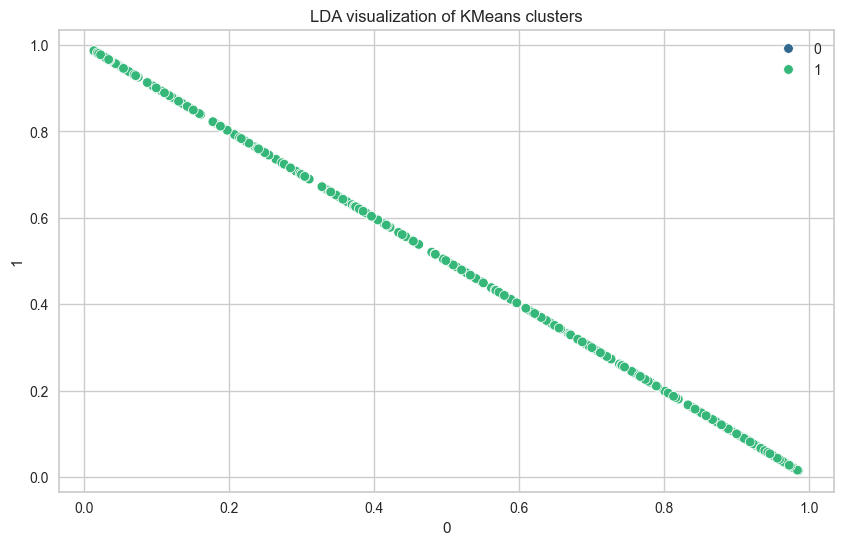

In [373]:
# LDA visualization
lda = LatentDirichletAllocation(n_components=2, random_state=42)
X_lda = lda.fit_transform(X_bow)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=labels, palette='viridis')
plt.title('LDA visualization of KMeans clusters')
plt.xlabel('0')
plt.ylabel('1')
plt.show()

## Function to test modules by using bag-of-words as a vectorizer

In [302]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [320]:

def test_models_bag_of_words(df, text_column, target_column):
    # Convert target column to integer
    df[target_column] = df[target_column].astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[target_column], test_size=0.25, random_state=42)

    # Create CountVectorizer to convert text data into numerical features
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    ## Création du DataFrame
    df_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
    df_vectorized
    ## Affichage du DataFrame

    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(C=3.0, 
                                      max_iter=2000, 
                                      multi_class='auto', 
                                      class_weight=None),
        'SVM': SVC( kernel='linear'),
        'Decision Tree': DecisionTreeClassifier(),
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_vectorized, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test_vectorized)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy:", accuracy)
        
    return df_vectorized


In [321]:
X_bow = test_models_bag_of_words(df,'content_lemmatized','target')
# print("Bag of Words (BoW) :\n")
# X_bow

Logistic Regression Accuracy: 0.8533333333333334
SVM Accuracy: 0.8333333333333334
Decision Tree Accuracy: 0.7333333333333333


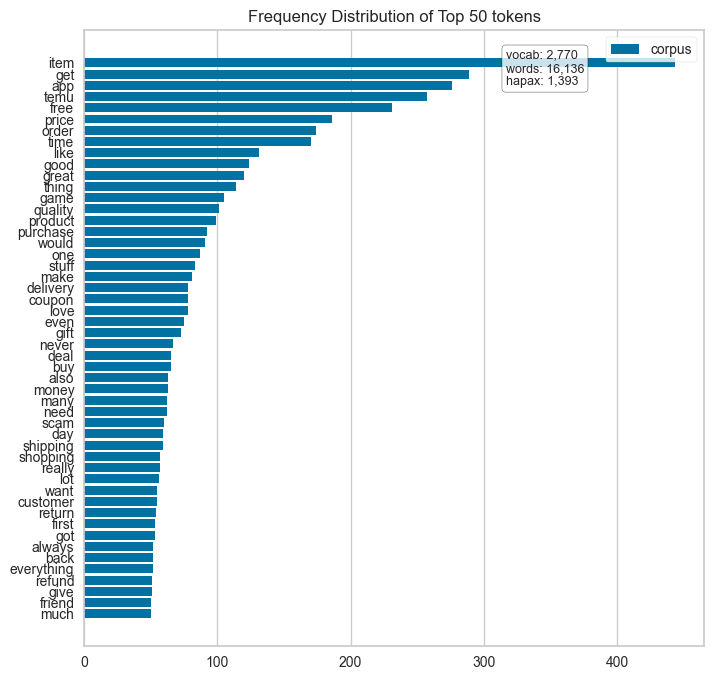

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [253]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = CountVectorizer()
docs = vec.fit_transform(X_train)
features = vec.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

## Function to test modules by using TF-IDF as a vectorizer

In [322]:

def test_models_bag_of_words(df, text_column, target_column):
    # Convert target column to integer
    df[target_column] = df[target_column].astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[target_column], test_size=0.25, random_state=42)

    # Create CountVectorizer to convert text data into numerical features
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    ## Création du DataFrame
    df_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
    df_vectorized
    ## Affichage du DataFrame

    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(C=3.0, 
                                      max_iter=2000, 
                                      multi_class='auto', 
                                      class_weight=None),
        'SVM': SVC( kernel='linear'),
        'Decision Tree': DecisionTreeClassifier()
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_vectorized, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test_vectorized)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy:", accuracy)
        
    return df_vectorized


In [315]:
X_tfidf = test_models_bag_of_words(df,'content_lemmatized','target')
# print("TF-IDF :\n")
# X_tfidf

Logistic Regression Accuracy: 0.8666666666666667
SVM Accuracy: 0.86
Decision Tree Accuracy: 0.7533333333333333


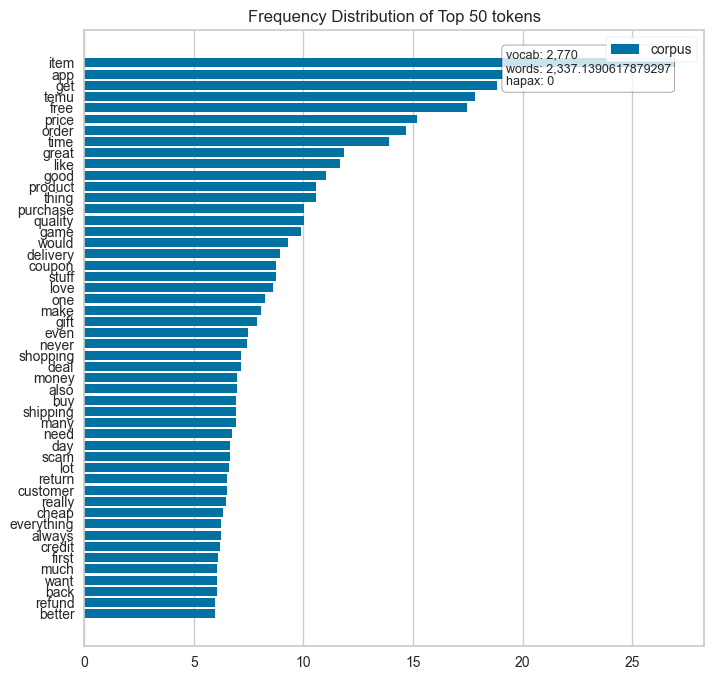

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [368]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = TfidfVectorizer() 
docs = vec.fit_transform(X_train)
features = vec.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

In [336]:
def test_models_for_ngram(df, text_column, target_column, n):
    # Convert target column to integer
    df[target_column] = df[target_column].astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[target_column], test_size=0.1, random_state=42)

    # Create N-grammes vectorizer to convert text data into numerical features
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(C=7.0, kernel='linear'),
        'Decision Tree': DecisionTreeClassifier(),
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_vectorized, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test_vectorized)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} Accuracy:", accuracy)
    

In [337]:
# N = 1
test_models_for_ngram(df,'content_lemmatized','target',1)


Logistic Regression Accuracy: 0.8666666666666667
SVM Accuracy: 0.8166666666666667
Decision Tree Accuracy: 0.7333333333333333


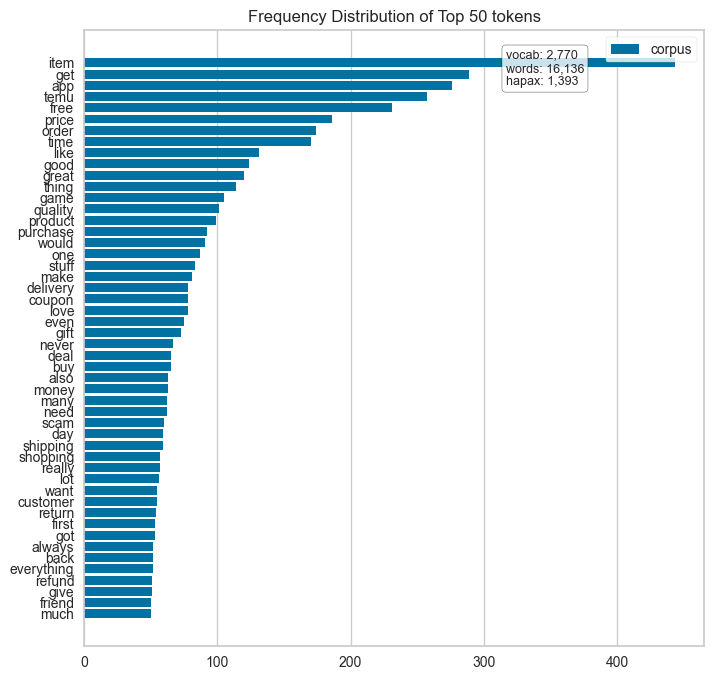

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [335]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = CountVectorizer(analyzer='word', ngram_range=(1, 1))
docs = vec.fit_transform(X_train)
features = vec.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

In [327]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def test_models_for_ngram(df, text_column, target_column, n):
    # Convert target column to integer
    df[target_column] = df[target_column].astype(int)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[text_column], df[target_column], test_size=0.1, random_state=42)

    # Create N-gram vectorizer to convert text data into numerical features
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(C=7.0, kernel='linear'),
        'Decision Tree': DecisionTreeClassifier()
    }

    results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train_vectorized, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test_vectorized)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results.append((model_name, accuracy))
        print(f"{model_name} Accuracy:", accuracy)

    return results




Logistic Regression Accuracy: 0.7833333333333333
SVM Accuracy: 0.75
Decision Tree Accuracy: 0.5833333333333334
                 Model  Accuracy
0  Logistic Regression  0.783333
1                  SVM  0.750000
2        Decision Tree  0.583333


In [329]:
# N = 2
results = test_models_for_ngram(df, 'content_lemmatized', 'target', 2)

Logistic Regression Accuracy: 0.7833333333333333
SVM Accuracy: 0.75
Decision Tree Accuracy: 0.5833333333333334


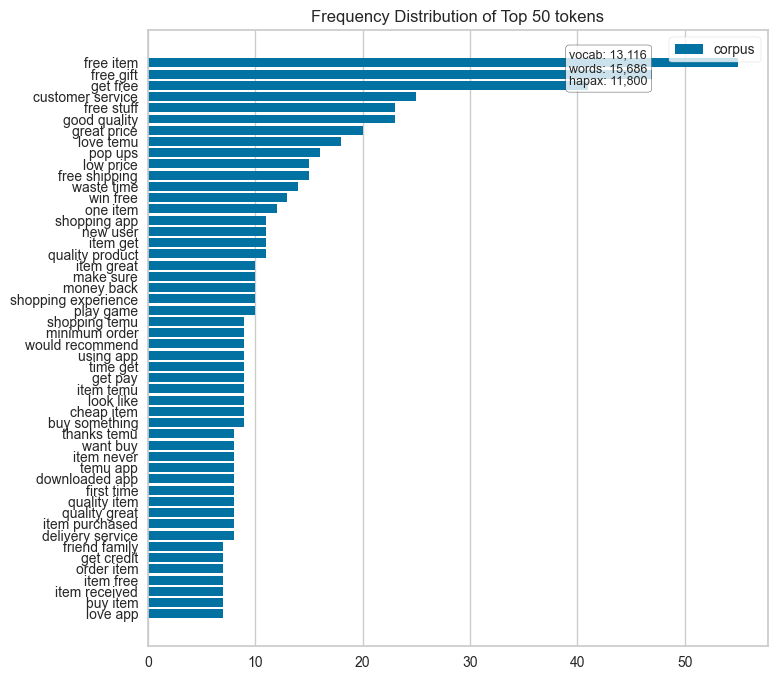

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [365]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = CountVectorizer(analyzer='word', ngram_range=(2, 2))
docs = vec.fit_transform(X_train)
features = vec.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

In [72]:
# N = 3
test_models_for_ngram(df,'content_lemmatized','target',3)

## Création du DataFrame
df_vectorized = pd.DataFrame(X_test_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
## Affichage du DataFrame
print("\n\n 3-gram:\n")
df_vectorized

Random Forest Accuracy: 0.4666666666666667
Logistic Regression Accuracy: 0.6833333333333333
SVM Accuracy: 0.6833333333333333
Decision Tree Accuracy: 0.48333333333333334
KNN Accuracy: 0.5833333333333334


 3-gram:



aaree  ability      able  aboyout  absoloute  absolute  absolutely  \
0      0.0      0.0  0.150721      0.0        0.0       0.0         0.0   
1      0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
2      0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
3      0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
4      0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
..     ...      ...       ...      ...        ...       ...         ...   
145    0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
146    0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
147    0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
148    0.0      0.0  0.000000      0.0        0.0       0.0         0.0   
149    0.0      0.0  0.000000      0.0        0.0       0.0         0.0   

     abused  acc  accept  ...  yountil  youp  youre  yousing  youtube  yoyou  \
0       0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
1       0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
2       0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
3       0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
4       0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
..      ...  ...     ...  ...      ...   ...    ...      ...      ...    ...   
145     0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
146     0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
147     0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
148     0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   
149     0.0  0.0     0.0  ...      0.0   0.0    0.0      0.0      0.0    0.0   

     yoyour   yr  zero  zoom  
0       0.0  0.0   0.0   0.0  
1       0.0  0.0   0.0   0.0  
2       0.0  0.0   0.0   0.0  
3       0.0  0.0   0.0   0.0  
4       0.0  0.0   0.0   0.0  
..      ...  ...   ...   ...  
145     0.0  0.0   0.0   0.0  
146     0.0  0.0   0.0   0.0  
147     0.0  0.0   0.0   0.0  
148     0.0  0.0   0.0   0.0  
149     0.0  0.0   0.0   0.0  

[150 rows x 2770 columns]

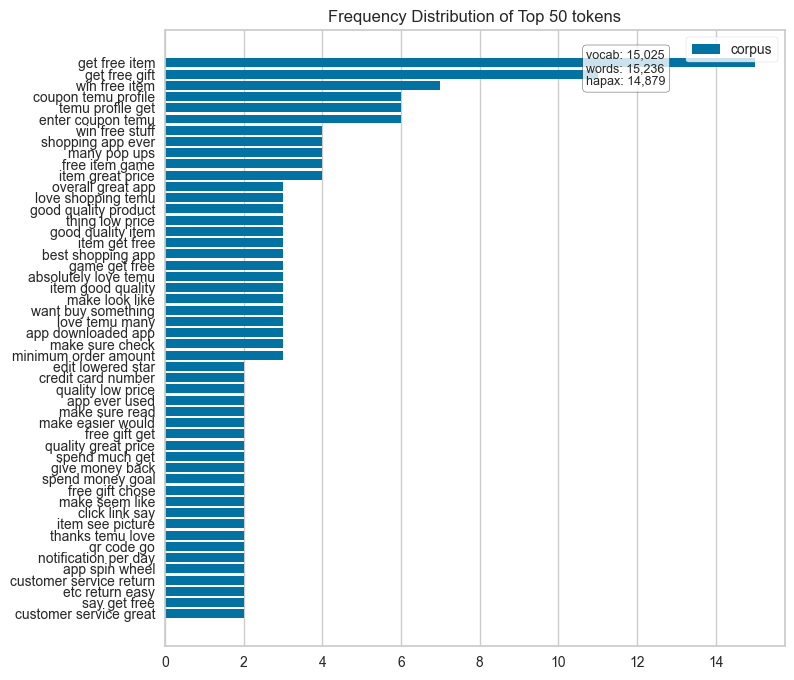

<Axes: title={'center': 'Frequency Distribution of Top 50 tokens'}>

In [366]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

vec = CountVectorizer(analyzer='word', ngram_range=(3, 3))
docs = vec.fit_transform(X_train)
features = vec.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='h' , size = (800,800))
visualizer.fit(docs)
visualizer.show()

## Modeling (Logistic Regression model/ TF-IDF vectorizer)

In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [409]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('temu_US_600__kmean.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content_lemmatized'], df['target'], test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450,), (150,), (450,), (150,))

In [410]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF vectorizer to convert text data into numerical features
vectorizer_tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words="english")
X_train_vectorized = vectorizer_tfidf.fit_transform(X_train)
X_test_vectorized = vectorizer_tfidf.transform(X_test)
X_train_vectorized.shape

(450, 827)

In [411]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(C=3.0, 
                                  max_iter=3000, 
                                  multi_class='auto', 
                                  class_weight=None)

# Train the model
logreg_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred = logreg_model.predict(X_test_vectorized)

# Calculate accuracy
# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, logreg_model.predict(X_train_vectorized))
train_precision = precision_score(y_train, logreg_model.predict(X_train_vectorized))
train_recall = recall_score(y_train, logreg_model.predict(X_train_vectorized))
train_f1 = f1_score(y_train, logreg_model.predict(X_train_vectorized))


test_accuracy = accuracy_score(y_test, logreg_model.predict(X_test_vectorized))
test_precision = precision_score(y_test, logreg_model.predict(X_test_vectorized))
test_recall = recall_score(y_test, logreg_model.predict(X_test_vectorized))
test_f1 = f1_score(y_test, logreg_model.predict(X_test_vectorized))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

performance_table

Performance     Train      Test
0    Accuracy  0.966667  0.840000
1   Precision  0.995122  0.862500
2      Recall  0.935780  0.841463
3    F1 Score  0.964539  0.851852

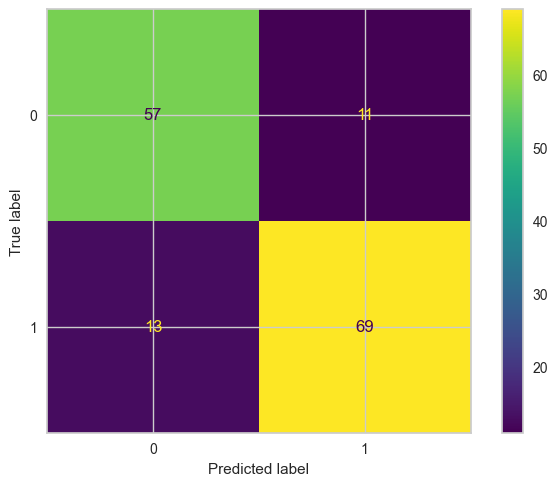

In [412]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predict = logreg_model.predict(X_test_vectorized)
cm=confusion_matrix(y_test,predict, labels=logreg_model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
display.plot()

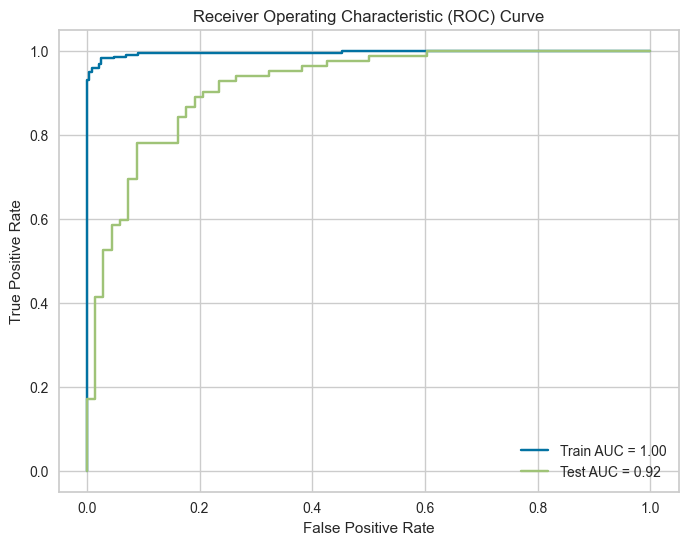

In [413]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = logreg_model.predict_proba(X_train_vectorized)[:, 1]
y_test_pred = logreg_model.predict_proba(X_test_vectorized)[:, 1]

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import lime
from lime.lime_text import LimeTextExplainer

# Create a function that wraps the predict_proba method
predict_proba_fn = lambda x: logreg_model.predict_proba(vectorizer.transform(x))

# Create a LIME explainer
explainer = lime.lime_text.LimeTextExplainer(class_names=['Negative', 'Positive'])

# Select a specific example to interpret
example_idx = 10
example_text = X_test.iloc[example_idx]  # Extract the first sentence
example_label = y_test.iloc[example_idx]

# Generate an explanation for the example using the vectorized representation

explanation = explainer.explain_instance(example_text, predict_proba_fn, num_features=5, labels=[1], num_samples=1000, distance_metric='cosine')
explanation.show_in_notebook(text=True)

# Print the predicted label and the top features contributing to the prediction
print("Example Text:", example_text)
print("True Label:", example_label)
print("Predicted Label:", logreg_model.predict(vectorizer.transform([example_text]))[0])
print("Top Features:")

for feature, weight in explanation.as_list():
    print(feature, weight)
print('\n')

In [414]:
import pickle
filename='trained_model_regression_logistique'
pickle.dump(logreg_model,open(filename, 'wb'))

file='Tfidf_vectorizer'
pickle.dump(vectorizer_tfidf,open(file, 'wb'))

In [415]:
import pickle
from sklearn.model_selection import train_test_split

#loading the saved model
loaded_model=pickle.load(open('trained_model_regression_logistique', 'rb'))
loaded_vectorizer=pickle.load(open('Tfidf_vectorizer', 'rb'))

print(X_test[110])
print(y_test.iloc[110])

X_new = X_test_vectorized[110].reshape(1, -1)

prediction = loaded_model.predict(X_new)

print(prediction)
if (prediction[0]==0):
    print("Negative review")
else:
    print("Positive review")


excellant good far advertised delivered much quicker expected remember aprox may added important duty collect still worth fuel charge get shop choice many item even seen price often alter order reduced affordable amount glad able shop easily home real pleasure
1
[1]
Positive review


In [392]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('temu_US_600__kmean.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['content_lemmatized'], df['K_means_clust'], test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.feature_extraction.text import TfidfVectorizer
# Create TF-IDF vectorizer to convert text data into numerical features
vectorizer_tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words="english")
X_train_vectorized = vectorizer_tfidf.fit_transform(X_train)
X_test_vectorized = vectorizer_tfidf.transform(X_test)
X_train_vectorized.shape

(450, 827)

# Modeling (SVM model/ TF-IDF vectorizer)

In [393]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


SVC_model = SVC(kernel='linear', probability=True)

# Train the model
SVC_model.fit(X_train_vectorized, y_train)

# Make predictions on the testing set
y_pred = SVC_model.predict(X_test_vectorized)

# Calculate accuracy
# Calculer les performances sur les ensembles d'entraînement et de test
train_accuracy = accuracy_score(y_train, SVC_model.predict(X_train_vectorized))
train_precision = precision_score(y_train, SVC_model.predict(X_train_vectorized))
train_recall = recall_score(y_train, SVC_model.predict(X_train_vectorized))
train_f1 = f1_score(y_train, SVC_model.predict(X_train_vectorized))


test_accuracy = accuracy_score(y_test, SVC_model.predict(X_test_vectorized))
test_precision = precision_score(y_test, SVC_model.predict(X_test_vectorized))
test_recall = recall_score(y_test, SVC_model.predict(X_test_vectorized))
test_f1 = f1_score(y_test, SVC_model.predict(X_test_vectorized))

# Créer un tableau des performances
performance_table = pd.DataFrame({
    'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

performance_table

Performance  Train      Test
0    Accuracy    1.0  0.873333
1   Precision    1.0  0.891892
2      Recall    1.0  0.933962
3    F1 Score    1.0  0.912442

<Axes: >

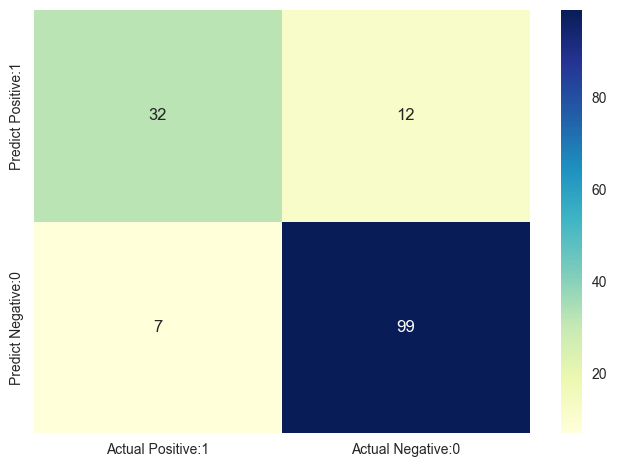

In [394]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

predict = SVC_model.predict(X_test_vectorized)
cm=confusion_matrix(y_test,predict, labels=SVC_model.classes_)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

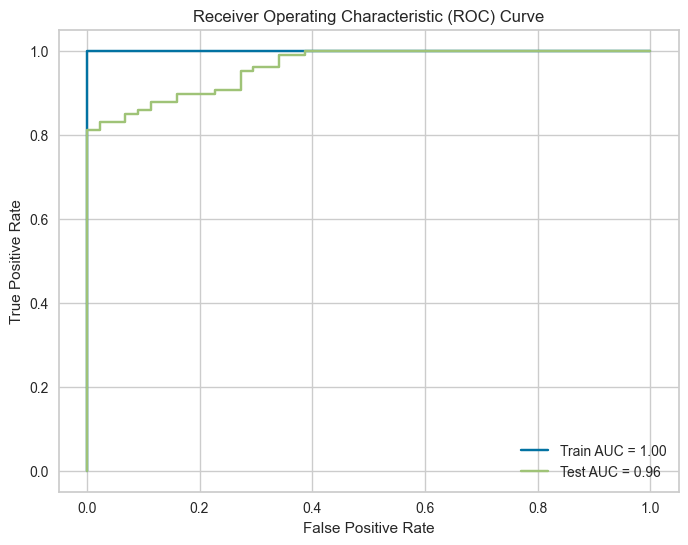

In [395]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = SVC_model.predict_proba(X_train_vectorized)[:, 1]
y_test_pred = SVC_model.predict_proba(X_test_vectorized)[:, 1]

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [397]:
import pickle
filename='trained_model_SVM'
pickle.dump(SVC_model,open(filename, 'wb'))


#loading the saved model
loaded_svm_model=pickle.load(open('trained_model_SVM', 'rb'))
vectorizer_model=pickle.load(open('Tfidf_vectorizer', 'rb'))

print(X_test.iloc[2])
print(y_test.iloc[2])

X_new = X_test_vectorized[2].reshape(1, -1)

prediction = loaded_svm_model.predict(X_new)

print(prediction)
if (prediction[0]==0):
    print("Negative review")
else:
    print("Positive review")


gotten good product discount promotion deal spammy deceptive system actively change deal mid transaction add requirement order fulfill deal extremely annoying experience told system send invite price cut credit one invite supposed finish price advertised dollar cut dollar left cut provided cut half ag
1
[1]
Positive review


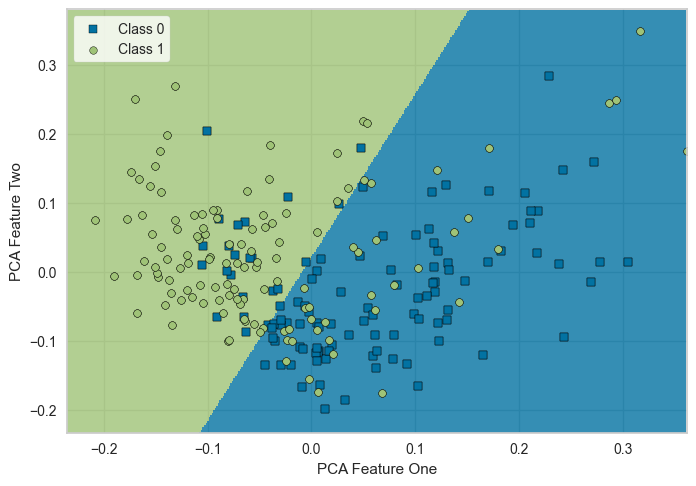

<Axes: xlabel='PCA Feature One', ylabel='PCA Feature Two'>

In [398]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.contrib.classifier import DecisionViz
import pandas as pd

# Assuming df is already defined and contains 'content_lemmatized' and 'target'
vectorizer = TfidfVectorizer(stop_words="english")

X = df['content_lemmatized']
y = df['target']
X = vectorizer.fit_transform(X)

# Reduce the dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X_pca, y, test_size=0.4, random_state=42)

# Ensure that y_train and y_test are numpy arrays or Pandas Series with correct indices
y_train = pd.Series(y_train).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Initialize the DecisionViz visualizer with a linear SVM
viz = DecisionViz(
    SVC(kernel="linear"), title="Linear SVM",
    features=['PCA Feature One', 'PCA Feature Two'],
    classes=['Class 0', 'Class 1']
)

# Fit the visualizer to the training data and visualize the decision boundaries
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()
